In [2]:
pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 2.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.4 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


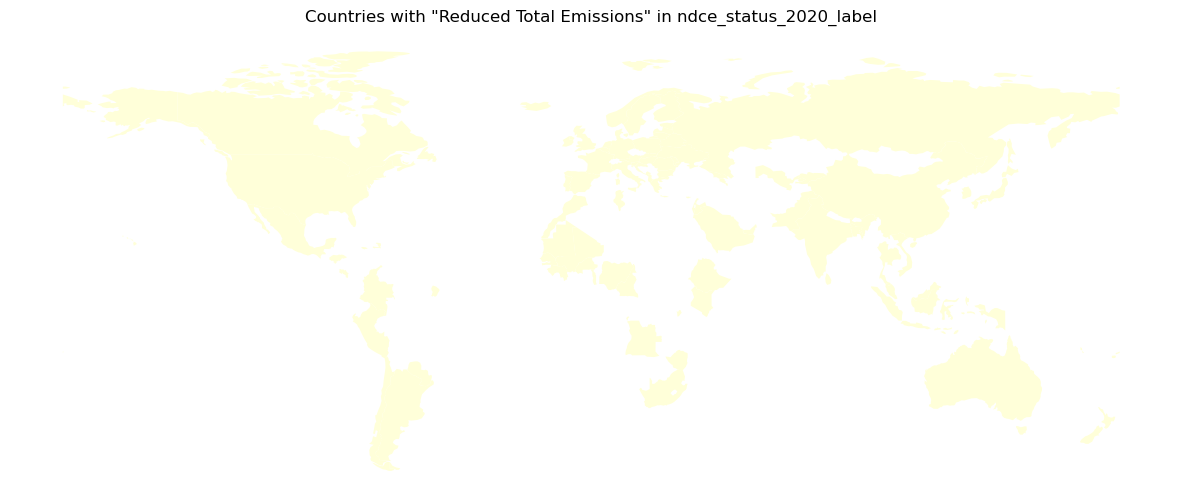

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Replace NaN values with an empty string in the 'ndce_status_2020_label' column
df['ndce_status_2020_label'] = df['ndce_status_2020_label'].fillna('')

# Filter the rows where 'ndce_status_2020_label' column contains 'Reduced Total Emissions'
filtered_df = df[df['ndce_status_2020_label'].str.contains('Reduced Total Emissions')]

# Read the shapefile of the world map into a geopandas dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the filtered dataframe with the world dataframe on the 'country' column
merged_df = world.merge(filtered_df, left_on='name', right_on='Country')

# Create a new column 'color' based on the values in the 'ndce_status_2020_label' column
merged_df['color'] = ''
merged_df.loc[merged_df['ndce_status_2020_label'].str.contains('Submitted New or Updated NDC'), 'color'] = 'blue'
merged_df.loc[merged_df['ndce_status_2020_label'] == '', 'color'] = 'orange'

# Plot the merged dataframe, coloring the filtered countries based on the 'color' column
ax = merged_df.plot(column='color', cmap='YlGnBu', figsize=(15, 10))
ax.set_title('Countries with "Reduced Total Emissions" in ndce_status_2020_label')
ax.set_axis_off()
plt.show()


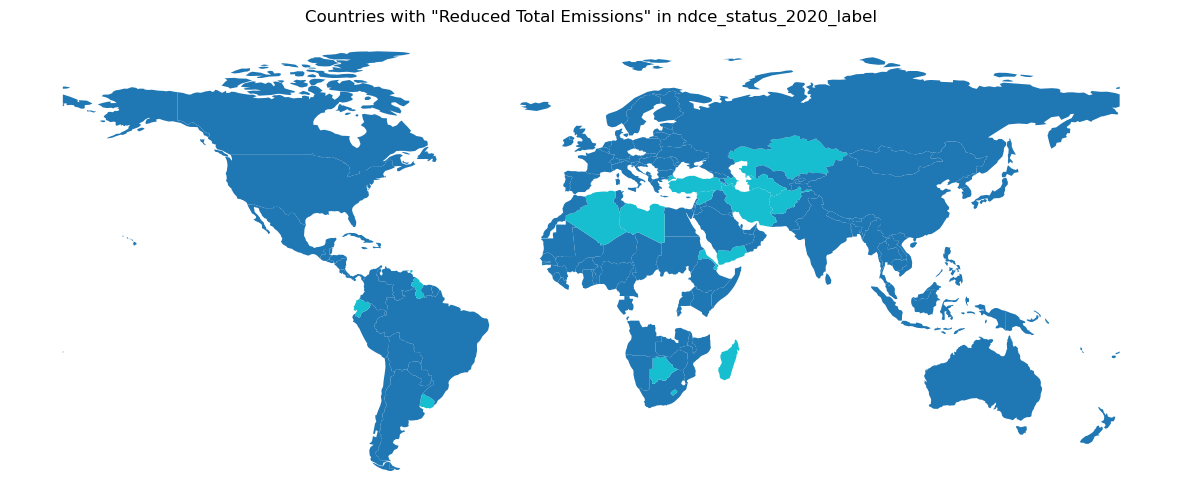

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Create a new column 'color' in the dataframe and set it to 'orange' by default
df['color'] = 'orange'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC'
df.loc[df['ndce_status_2020_label'].str.contains('Submitted New or Updated NDC', na=False), 'color'] = 'blue'

# Read the shapefile of the world map into a geopandas dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the filtered dataframe with the world dataframe on the 'country' column
merged_df = world.merge(df, left_on='name', right_on='Country')

# Plot the merged dataframe, coloring the countries based on the 'color' column
ax = merged_df.plot(column='color', figsize=(15, 10))
ax.set_title('Countries with "Reduced Total Emissions" in ndce_status_2020_label')
ax.set_axis_off()
plt.show()


In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Create a new column 'color' in the dataframe and set it to 'orange' by default
df['color'] = 'orange'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC with Reduced Total Emissions'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC with Reduced Total Emissions', 'color'] = 'blue'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC', 'color'] = 'green'

# Update the 'color' column for rows where 'ndce_status_2020_label' is blank
df.loc[df['ndce_status_2020_label'].isna(), 'color'] = 'purple'

# Read the shapefile of the world map into a geopandas dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the filtered dataframe with the world dataframe on the 'name' column
merged_df = world.merge(df, left_on='name', right_on='Country')

# Calculate the total percentage of global emissions for countries with 'Submitted New or Updated NDC with Reduced Total Emissions'
reduced_emissions_total = merged_df.loc[merged_df['ndce_status_2020_label'] == 'Submitted New or Updated NDC with Reduced Total Emissions', 'ndce_ghg'].sum()

# Add the total to the plot
ax.text(-170, -75, f'Total Reduced Emissions: {reduced_emissions_total:.2f}%', fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})

# Plot the merged dataframe, coloring the countries based on the 'color' column
ax = merged_df.plot(column='color', figsize=(15, 10))
ax.set_title('Countries with "Submitted New or Updated NDC with Reduced Total Emissions" or "Submitted New or Updated NDC" or blank ndce_status_2020_label')
ax.set_axis_off()
plt.show()


ValueError: Unknown format code 'f' for object of type 'str'

In [31]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Create a new column 'color' in the dataframe and set it to 'orange' by default
df['color'] = 'orange'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC with Reduced Total Emissions'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC with Reduced Total Emissions', 'color'] = 'blue'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC', 'color'] = 'green'

# Update the 'color' column for rows where 'ndce_status_2020_label' is blank
df.loc[df['ndce_status_2020_label'].isna(), 'color'] = 'purple'

# Read the shapefile of the world map into a geopandas dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the filtered dataframe with the world dataframe on the 'name' column
merged_df = world.merge(df, left_on='name', right_on='Country')

# Calculate the total reduced emissions
reduced_emissions_total = df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC with Reduced Total Emissions', 'ndce_ghg'].sum()

# Add the total to the plot
ax = merged_df.plot(column='color', figsize=(15, 10))
ax.text(-170, -75, 'Total Reduced Emissions: %.2f%%' % reduced_emissions_total, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
ax.set_title('Countries with "Submitted New or Updated NDC with Reduced Total Emissions" or "Submitted New or Updated NDC" or blank ndce_status_2020_label')
ax.set_axis_off()
plt.show()



TypeError: can only concatenate str (not "int") to str

TypeError: can only concatenate str (not "int") to str

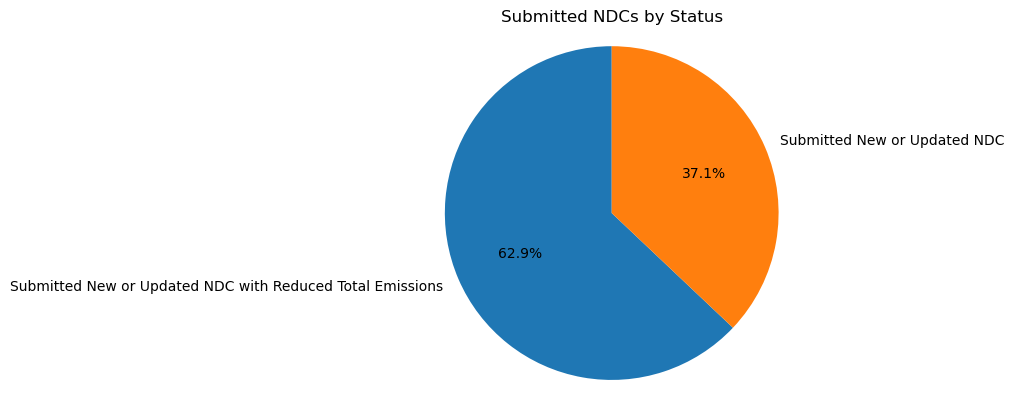

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Fill blank values in the 'ndce_ghg' column with 0
df['ndce_ghg'].fillna(0, inplace=True)

# Create a pie chart of the submitted NDCs by status
status_counts = df['ndce_status_2020_label'].value_counts()
labels = status_counts.index.tolist()
values = status_counts.values.tolist()

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Submitted NDCs by Status')

# Calculate the total reduced emissions
reduced_emissions_total = df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC with Reduced Total Emissions', 'ndce_ghg'].fillna(0).sum()

# Add the total to the plot
ax.text(-170, -75, f'Total Reduced Emissions: {reduced_emissions_total:.2f}%', fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()


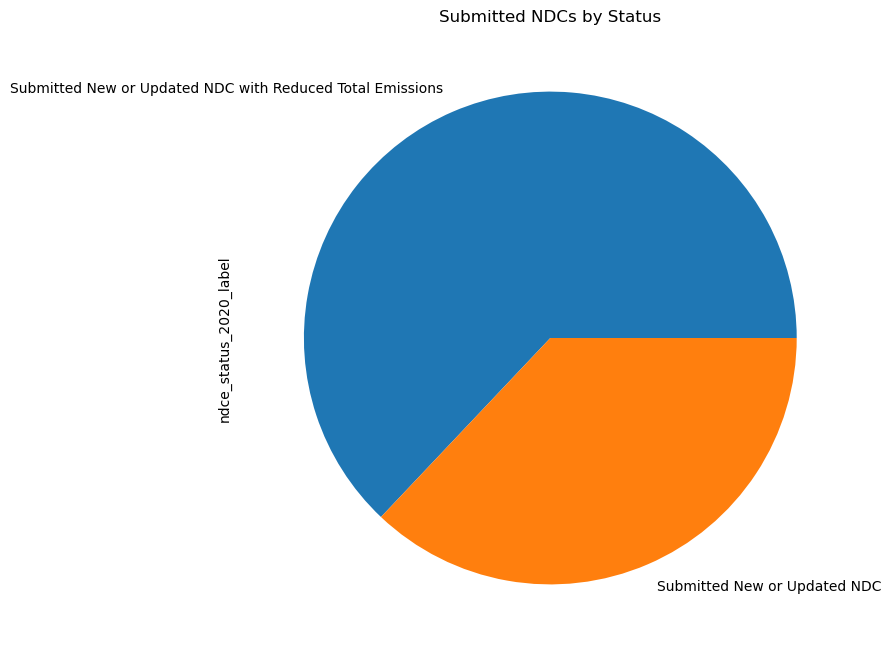

Total reduced emissions: 85.88


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Calculate the total reduced emissions
reduced_emissions_total = df.loc[(df['ndce_status_2020_label'] == 'Submitted New or Updated NDC with Reduced Total Emissions') & (df['ndce_ghg'] != ''), 'ndce_ghg'].str.replace('%','').astype(float).sum()

# Create a pie chart of the submitted NDCs by status
status_counts = df['ndce_status_2020_label'].value_counts()
status_counts.plot(kind='pie', figsize=(8,8))
plt.title('Submitted NDCs by Status')
plt.show()

# Print the total reduced emissions
print(f'Total reduced emissions: {reduced_emissions_total:.2f}')



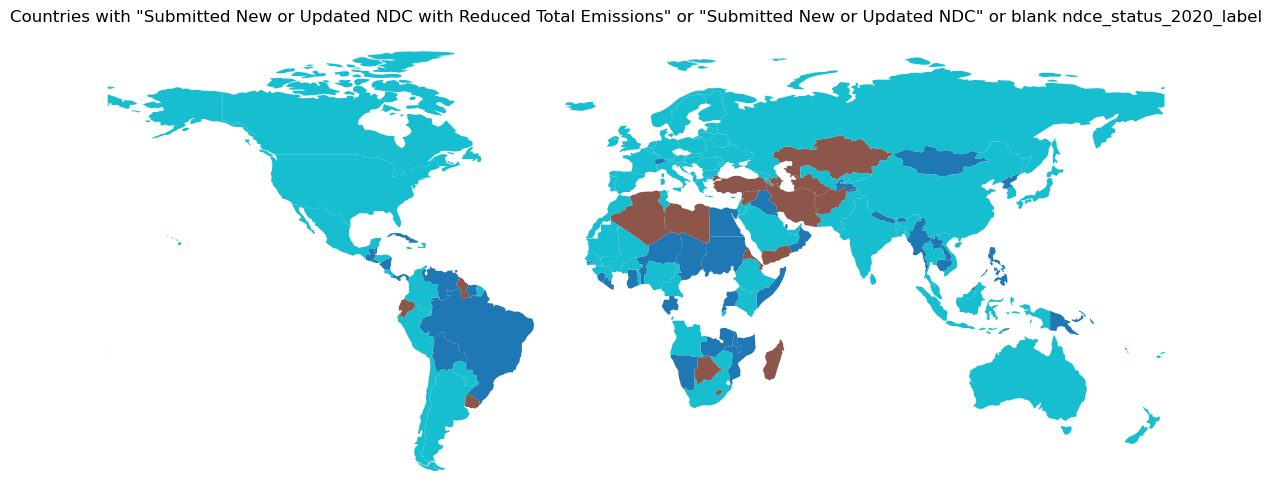

In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Create a new column 'color' in the dataframe and set it to 'orange' by default
df['color'] = 'orange'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC with Reduced Total Emissions'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC with Reduced Total Emissions', 'color'] = 'green'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC', 'color'] = 'blue'

# Update the 'color' column for rows where 'ndce_status_2020_label' is blank
df.loc[df['ndce_status_2020_label'].isna(), 'color'] = 'gray'

# Read the shapefile of the world map into a geopandas dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the filtered dataframe with the world dataframe on the 'name' column
merged_df = world.merge(df, left_on='name', right_on='Country')

# Plot the merged dataframe, coloring the countries based on the 'color' column
ax = merged_df.plot(column='color', figsize=(15, 10))
ax.set_title('Countries with "Submitted New or Updated NDC with Reduced Total Emissions" or "Submitted New or Updated NDC" or blank ndce_status_2020_label')
ax.set_axis_off()
plt.show()


/var/folders/6f/v_r1yz5x55n88t20krfltws00000gn/T/ipykernel_87101/3974530995.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_df.dropna(subset=['ndce_ghg'], inplace=True)


ValueError: Unknown format code 'f' for object of type 'str'

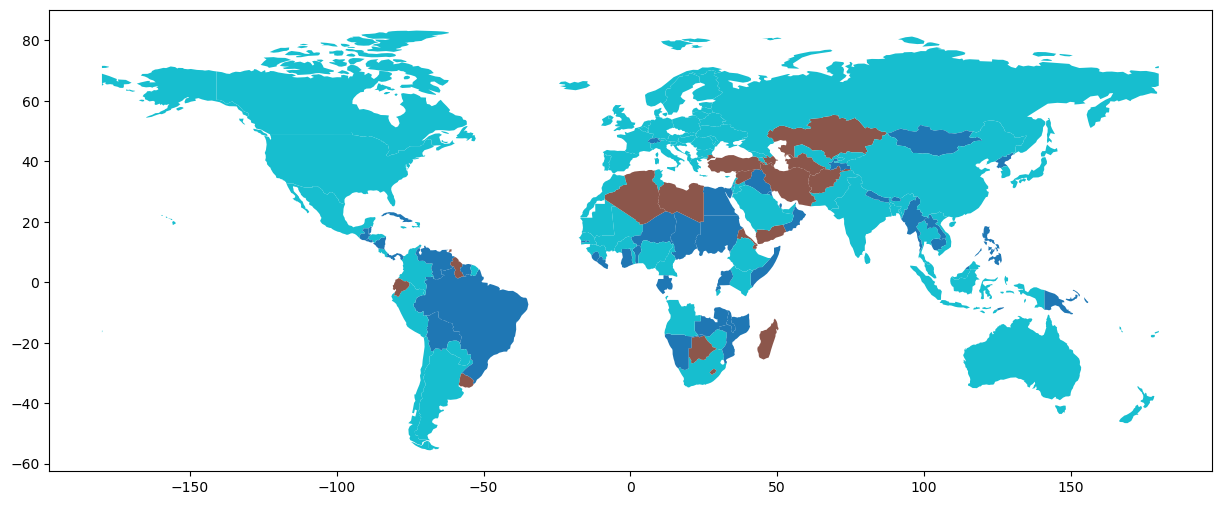

In [37]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Create a new column 'color' in the dataframe and set it to 'orange' by default
df['color'] = 'orange'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC with Reduced Total Emissions'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC with Reduced Total Emissions', 'color'] = 'green'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC', 'color'] = 'blue'

# Update the 'color' column for rows where 'ndce_status_2020_label' is blank
df.loc[df['ndce_status_2020_label'].isna(), 'color'] = 'gray'

# Filter the dataframe to include only the rows where 'color' is 'green'
green_df = df[df['color'] == 'green']

# Drop the rows where 'ndce_ghg' is missing (NaN)
green_df.dropna(subset=['ndce_ghg'], inplace=True)

# Calculate the sum of the remaining values in the 'ndce_ghg' column
ghg_sum = green_df['ndce_ghg'].sum()

# Read the shapefile of the world map into a geopandas dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the filtered dataframe with the world dataframe on the 'name' column
merged_df = world.merge(df, left_on='name', right_on='Country')

# Plot the merged dataframe, coloring the countries based on the 'color' column
ax = merged_df.plot(column='color', figsize=(15, 10))

# Display the sum of the 'ndce_ghg' column for the green countries as a figure on the left side of the graph
plt.figtext(0.1, 0.9, f'Sum of ndce_ghg for green countries: {ghg_sum:.2f}', fontsize=12, fontweight='bold')

ax.set_title('Countries with "Submitted New or Updated NDC with Reduced Total Emissions" or "Submitted New or Updated NDC" or blank ndce_status_2020_label')
ax.set_axis_off()
plt.show()


/var/folders/6f/v_r1yz5x55n88t20krfltws00000gn/T/ipykernel_87101/3929430790.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_df['ndce_ghg'] = green_df['ndce_ghg'].str.rstrip('%').astype('float') / 100.0


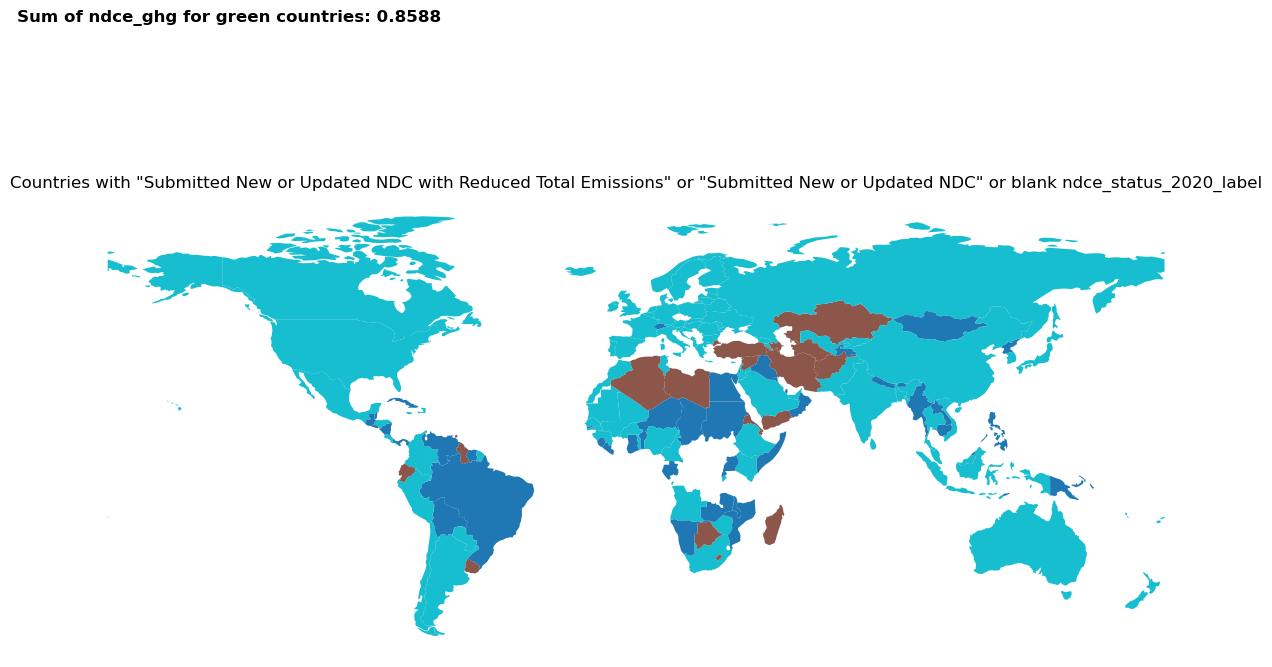

In [38]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Create a new column 'color' in the dataframe and set it to 'orange' by default
df['color'] = 'orange'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC with Reduced Total Emissions'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC with Reduced Total Emissions', 'color'] = 'green'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC', 'color'] = 'blue'

# Update the 'color' column for rows where 'ndce_status_2020_label' is blank
df.loc[df['ndce_status_2020_label'].isna(), 'color'] = 'gray'

# Filter the dataframe to include only the green countries
green_df = df.loc[df['color'] == 'green']

# Convert the values in the 'ndce_ghg' column from percentages to floats
green_df['ndce_ghg'] = green_df['ndce_ghg'].str.rstrip('%').astype('float') / 100.0

# Calculate the sum of the 'ndce_ghg' column for the green countries
ghg_sum = green_df['ndce_ghg'].sum()

# Read the shapefile of the world map into a geopandas dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the filtered dataframe with the world dataframe on the 'name' column
merged_df = world.merge(df, left_on='name', right_on='Country')

# Plot the merged dataframe, coloring the countries based on the 'color' column
ax = merged_df.plot(column='color', figsize=(15, 10))
ax.set_title('Countries with "Submitted New or Updated NDC with Reduced Total Emissions" or "Submitted New or Updated NDC" or blank ndce_status_2020_label')
ax.set_axis_off()

# Display the sum of the 'ndce_ghg' column for the green countries as a figure on the left side of the graph
plt.figtext(0.1, 0.9, f'Sum of ndce_ghg for green countries: {ghg_sum:.4f}', fontsize=12, fontweight='bold')

plt.show()


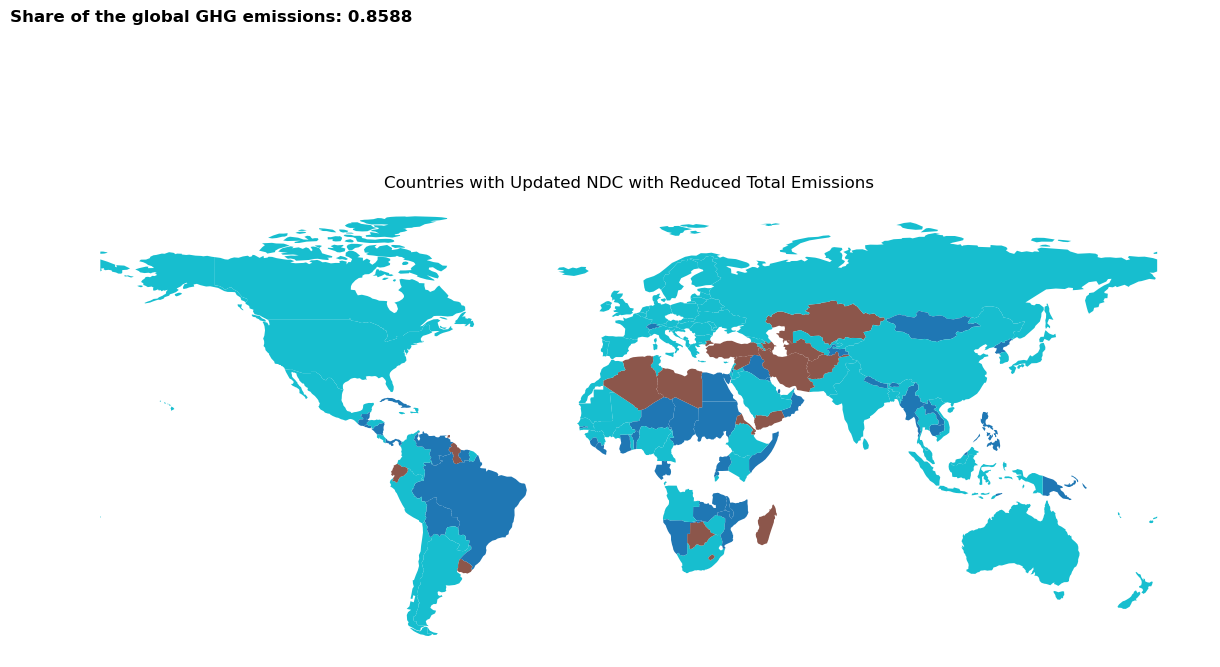

In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Create a new column 'color' in the dataframe and set it to 'orange' by default
df['color'] = 'orange'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC with Reduced Total Emissions'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC with Reduced Total Emissions', 'color'] = 'green'

# Update the 'color' column for rows where 'ndce_status_2020_label' contains 'Submitted New or Updated NDC'
df.loc[df['ndce_status_2020_label'] == 'Submitted New or Updated NDC', 'color'] = 'blue'

# Update the 'color' column for rows where 'ndce_status_2020_label' is blank
df.loc[df['ndce_status_2020_label'].isna(), 'color'] = 'gray'

# Filter the dataframe to include only the green countries
green_df = df.loc[df['color'] == 'green'].copy()

# Convert the values in the 'ndce_ghg' column from percentages to floats
green_df['ndce_ghg'] = green_df['ndce_ghg'].str.rstrip('%').astype('float') / 100.0

# Calculate the sum of the 'ndce_ghg' column for the green countries
ghg_sum = green_df['ndce_ghg'].sum()

# Read the shapefile of the world map into a geopandas dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the filtered dataframe with the world dataframe on the 'name' column
merged_df = world.merge(df, left_on='name', right_on='Country')

# Plot the merged dataframe, coloring the countries based on the 'color' column
ax = merged_df.plot(column='color', figsize=(15, 10))
ax.set_title('Countries with Updated NDC with Reduced Total Emissions')
ax.set_axis_off()

# Display the sum of the 'ndce_ghg' column for the green countries as a figure on the left side of the graph
plt.figtext(0.1, 0.9, f'Share of the global GHG emissions: {ghg_sum:.4f}', fontsize=12, fontweight='bold')

plt.show()


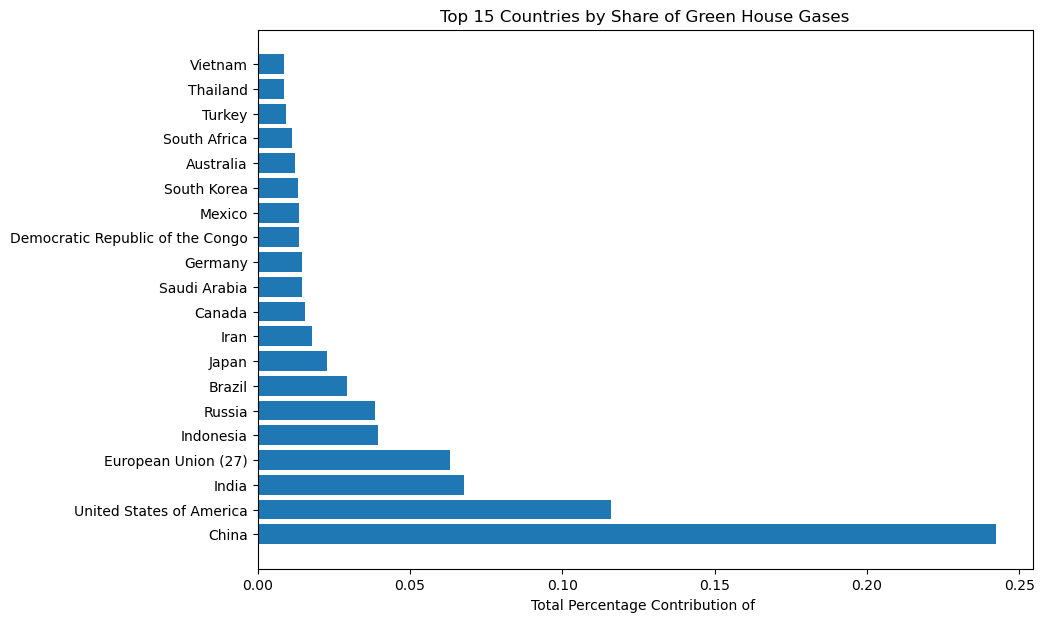

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Convert the values in the 'ndce_ghg' column from percentages to floats
df['ndce_ghg'] = df['ndce_ghg'].str.rstrip('%').astype('float') / 100.0

# Sort the dataframe by the 'ndce_ghg' column in descending order and select the top 15 rows
top_15 = df.sort_values('ndce_ghg', ascending=False).head(20)

# Create a horizontal bar chart of the top 15 countries
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(top_15['Country'], top_15['ndce_ghg'])
ax.set_xlabel('Total Percentage Contribution of GHG')
ax.set_title('Top 15 Countries by Share of Green House Gases')
plt.show()

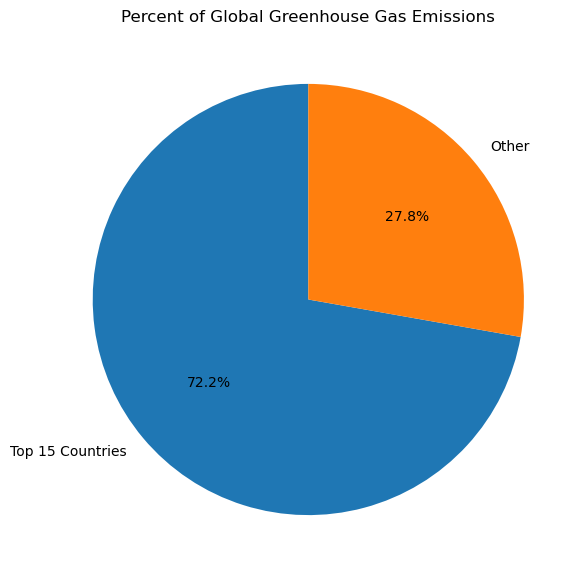

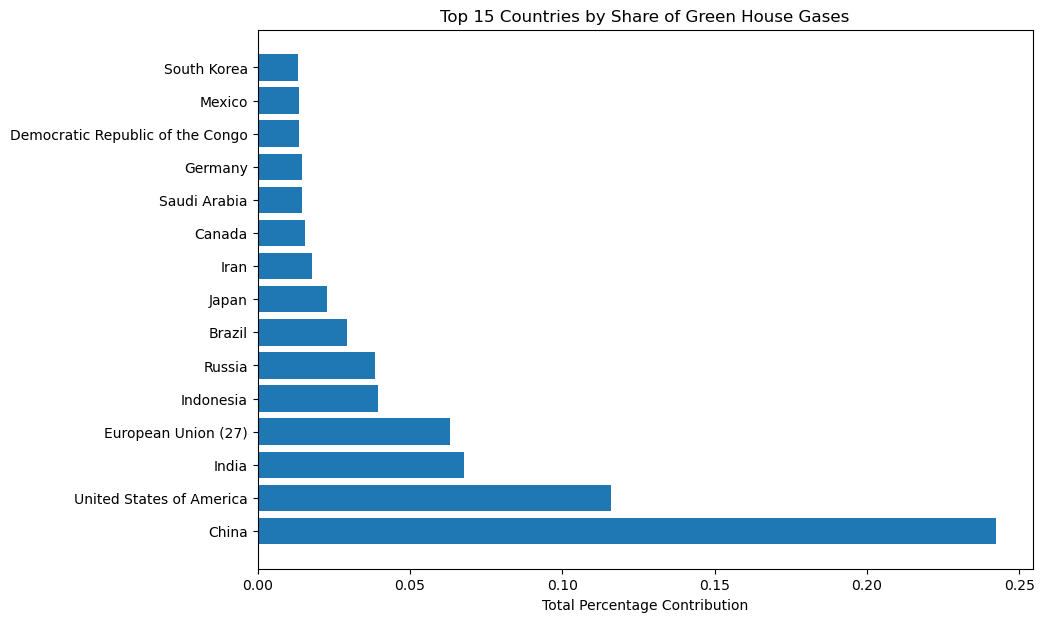

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Convert the values in the 'ndce_ghg' column from percentages to floats
df['ndce_ghg'] = df['ndce_ghg'].str.rstrip('%').astype('float') / 100.0

# Sort the dataframe by the 'ndce_ghg' column in descending order and select the top 15 rows
top_15 = df.sort_values('ndce_ghg', ascending=False).head(15)

# Calculate the sum of the 'ndce_ghg' column for all countries
total_emissions = df['ndce_ghg'].sum()

# Calculate the sum of the 'ndce_ghg' column for the top 15 countries
top_15_emissions = top_15['ndce_ghg'].sum()

# Calculate the 'other' percentage by subtracting the sum of the top 15 percentages from 1 (100%)
other_percentage = 1 - top_15_emissions

# Create a list of labels for the pie chart
labels = ['Top 15 Countries', 'Other']

# Create a list of sizes for the pie chart
sizes = [top_15_emissions, other_percentage]

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Percent of Global Greenhouse Gas Emissions')

# Create a horizontal bar chart of the top 15 countries
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(top_15['Country'], top_15['ndce_ghg'])
ax.set_xlabel('Total Percentage Contribution Green House Gases 2020')
ax.set_title('Top 15 Countries by Share of Green House Gases')
plt.show()


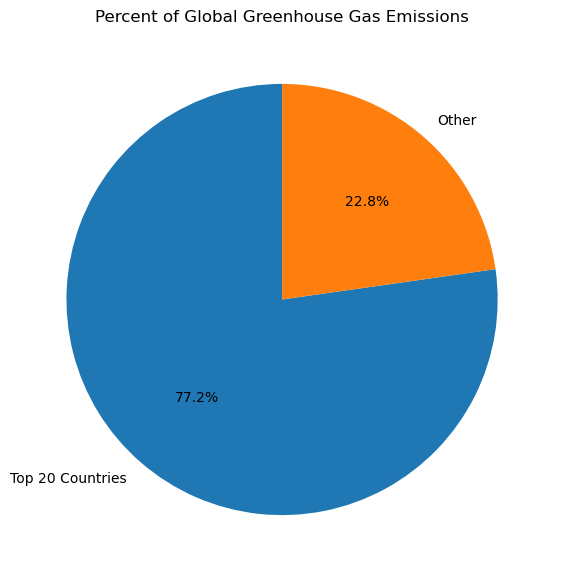

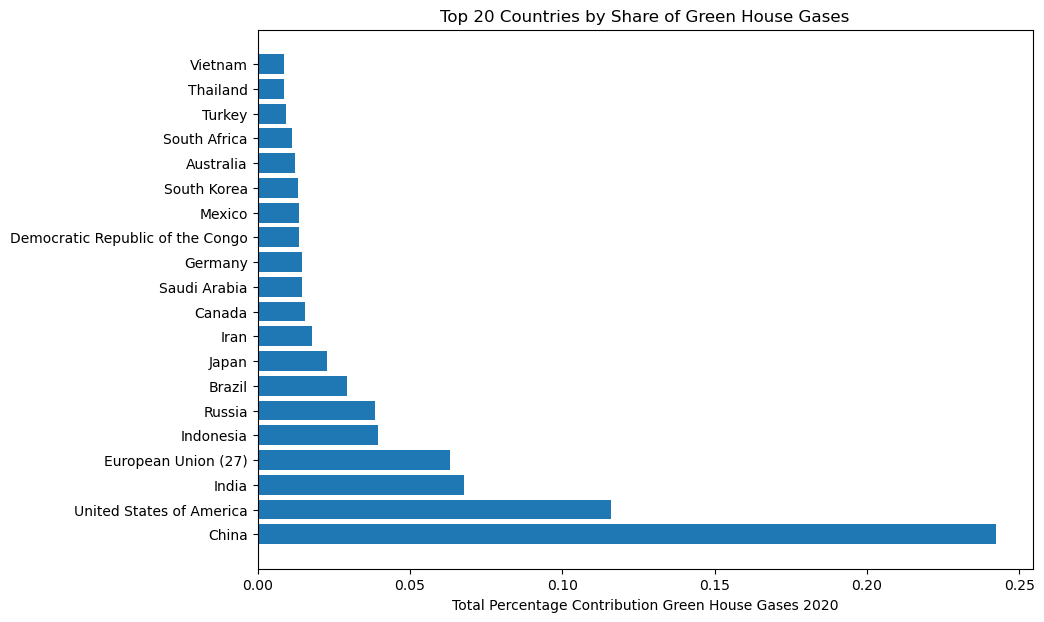

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/jacobwinter-bock/Downloads/ClimateWatch_NDC_Enhancement_Tracker/CW_NDC_enhancement_tracker.csv')

# Convert the values in the 'ndce_ghg' column from percentages to floats
df['ndce_ghg'] = df['ndce_ghg'].str.rstrip('%').astype('float') / 100.0

# Sort the dataframe by the 'ndce_ghg' column in descending order and select the top 20 rows
top_20 = df.sort_values('ndce_ghg', ascending=False).head(20)

# Calculate the sum of the 'ndce_ghg' column for all countries
total_emissions = df['ndce_ghg'].sum()

# Calculate the sum of the 'ndce_ghg' column for the top 20 countries
top_20_emissions = top_20['ndce_ghg'].sum()

# Calculate the 'other' percentage by subtracting the sum of the top 20 percentages from 1 (100%)
other_percentage = 1 - top_20_emissions

# Create a list of labels for the pie chart
labels = ['Top 20 Countries', 'Other']

# Create a list of sizes for the pie chart
sizes = [top_20_emissions, other_percentage]

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Percent of Global Greenhouse Gas Emissions')

# Create a horizontal bar chart of the top 20 countries
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(top_20['Country'], top_20['ndce_ghg'])
ax.set_xlabel('Total Percentage Contribution Green House Gases 2020')
ax.set_title('Top 20 Countries by Share of Green House Gases')
plt.show()


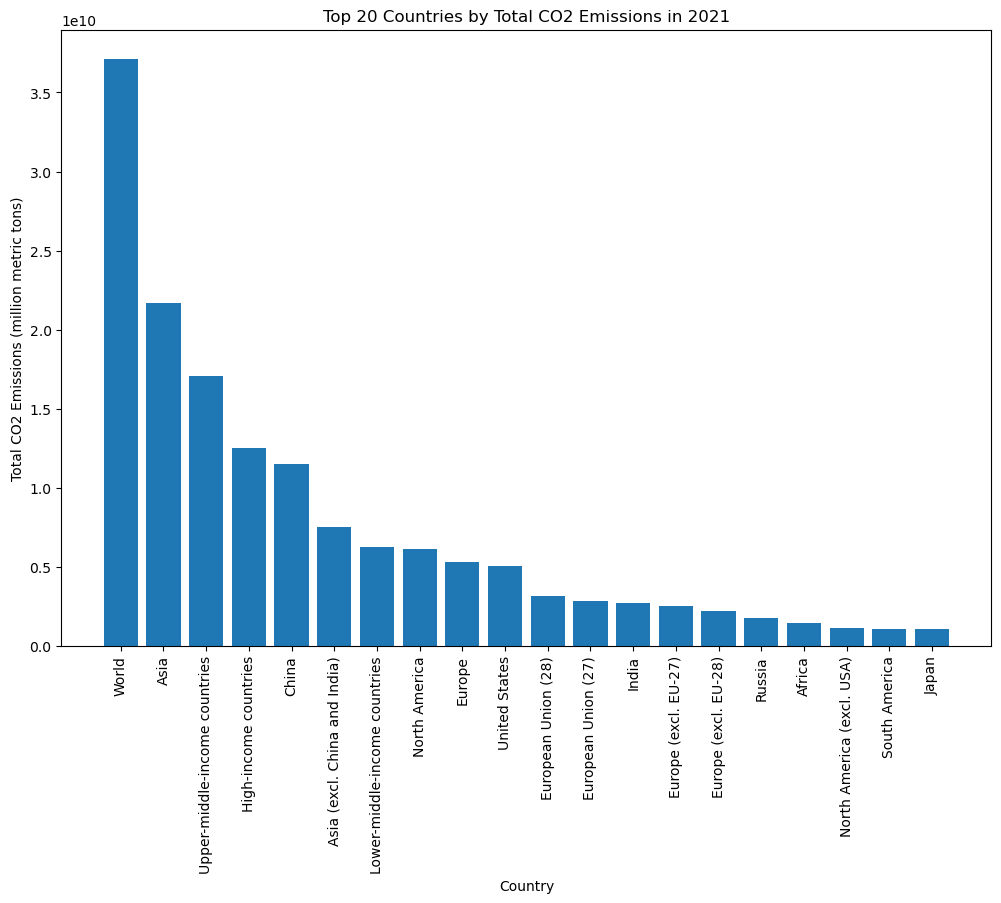

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv file
filename = '/Users/jacobwinter-bock/Downloads/co2-emissions-by-fuel-line.csv'
df = pd.read_csv(filename)

# filter data for year 2021
df = df[df['Year'] == 2021]

# replace empty cells with 0
df.fillna(0, inplace=True)

# calculate total CO2 emissions for each country
df['Total CO2 Emissions'] = df['Annual CO₂ emissions from oil'] + \
                            df['Annual CO₂ emissions from coal'] + \
                            df['Annual CO₂ emissions from cement'] + \
                            df['Annual CO₂ emissions from gas'] + \
                            df['Annual CO₂ emissions from flaring'] + \
                            df['Annual CO₂ emissions from other industry']

# group data by country and sort by total CO2 emissions in descending order
grouped_df = df.groupby(['Entity'])['Total CO2 Emissions'].sum().reset_index()
sorted_df = grouped_df.sort_values('Total CO2 Emissions', ascending=False)

# select top 20 countries
top_20_df = sorted_df.head(20)

# plot bar graph
plt.figure(figsize=(12,8))
plt.bar(top_20_df['Entity'], top_20_df['Total CO2 Emissions'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (million metric tons)')
plt.title('Top 20 Countries by Total CO2 Emissions in 2021')
plt.show()


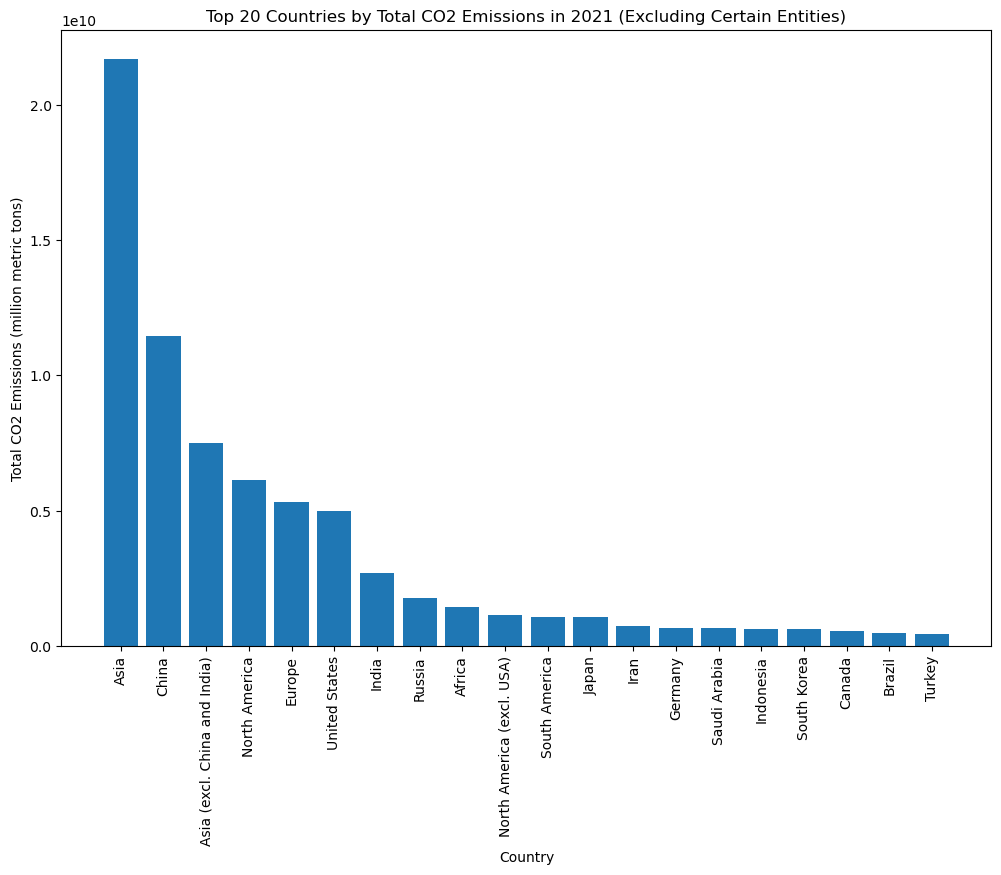

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv file
filename = '/Users/jacobwinter-bock/Downloads/co2-emissions-by-fuel-line.csv'
df = pd.read_csv(filename)

# filter data for year 2021
df = df[df['Year'] == 2021]

# replace empty cells with 0
df.fillna(0, inplace=True)

# calculate total CO2 emissions for each country
df['Total CO2 Emissions'] = df['Annual CO₂ emissions from oil'] + \
                            df['Annual CO₂ emissions from coal'] + \
                            df['Annual CO₂ emissions from cement'] + \
                            df['Annual CO₂ emissions from gas'] + \
                            df['Annual CO₂ emissions from flaring'] + \
                            df['Annual CO₂ emissions from other industry']

# group data by country and exclude certain entities
excluded_entities = ['World', 'Upper-middle-income countries', 'High-income countries', 
                     'Lower-middle-income countries', 'European Union (27)', 'European Union (28)',
                     'Europe (excl. EU-28)', 'Europe (excl. EU-27)', 'International transport']
grouped_df = df.groupby(['Entity'])['Total CO2 Emissions'].sum().reset_index()
grouped_df = grouped_df[~grouped_df['Entity'].isin(excluded_entities)]

# sort by total CO2 emissions in descending order
sorted_df = grouped_df.sort_values('Total CO2 Emissions', ascending=False)

# select top 20 countries
top_20_df = sorted_df.head(20)

# plot bar graph
plt.figure(figsize=(12,8))
plt.bar(top_20_df['Entity'], top_20_df['Total CO2 Emissions'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (million metric tons)')
plt.title('Top 20 Countries by Total CO2 Emissions in 2021 (Excluding Certain Entities)')
plt.show()


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# read Excel file
filename = '/Users/jacobwinter-bock/Downloads/co2-data.xlsx'
df = pd.read_excel(filename)

# filter data for year 2021
df = df[df['year'] == 2021]

# calculate total emissions per capita
df['total_co2_per_capita'] = df['cement_co2_per_capita'] + \
                             df['co2_including_luc_per_capita'] + \
                             df['coal_co2_per_capita'] + \
                             df['flaring_co2_per_capita'] + \
                             df['gas_co2_per_capita'] + \
                             df['ghg_per_capita'] + \
                             df['methane_per_capita'] + \
                             df['nitrous_oxide_per_capita'] + \
                             df['oil_co2_per_capita'] + \
                             df['other_co2_per_capita']

# group data by country and sum total emissions per capita
grouped_df = df.groupby(['country'])['cement_co2_per_capita', 'co2_including_luc_per_capita', 
                                     'coal_co2_per_capita', 'flaring_co2_per_capita', 
                                     'gas_co2_per_capita', 'ghg_per_capita', 'methane_per_capita',
                                     'nitrous_oxide_per_capita', 'oil_co2_per_capita', 
                                     'other_co2_per_capita', 'total_co2_per_capita'].sum()

# sort by total emissions per capita in descending order
sorted_df = grouped_df.sort_values('total_co2_per_capita', ascending=False)

# select top 20 countries
top_20_df = sorted_df.head(20)

# plot bar graph
plt.figure(figsize=(12,8))
plt.bar(top_20_df.index, top_20_df['cement_co2_per_capita'], label='Cement CO2 per capita')
plt.bar(top_20_df.index, top_20_df['co2_including_luc_per_capita'], bottom=top_20_df['cement_co2_per_capita'], 
        label='CO2 including LUC per capita')
plt.bar(top_20_df.index, top_20_df['coal_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + 
        top_20_df['co2_including_luc_per_capita'], label='Coal CO2 per capita')
plt.bar(top_20_df.index, top_20_df['flaring_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + 
        top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'], label='Flaring CO2 per capita')
plt.bar(top_20_df.index, top_20_df['gas_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + 
        top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + 
        top_20_df['flaring_co2_per_capita'], label='Gas CO2 per capita')
plt.bar(top_20_df.index, top_20_df['ghg_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + 
        top_20_df['co2_including_luc_per_capita'] + top_20_df['ghg_per_capita'] = _df['coal_co2_per_capita'] + top_20_df['flaring_co2_per_capita'] + top_20_df['gas_co2_per_capita']

# Create bar plots for each emission source
plt.bar(top_20_df.index, top_20_df['methane_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + top_20_df['flaring_co2_per_capita'] + top_20_df['gas_co2_per_capita'] + top_20_df['ghg_per_capita'], label='Methane per capita')
plt.bar(top_20_df.index, top_20_df['nitrous_oxide_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + top_20_df['flaring_co2_per_capita'] + top_20_df['gas_co2_per_capita'] + top_20_df['ghg_per_capita'] + top_20_df['methane_per_capita'], label='Nitrous oxide per capita')
plt.bar(top_20_df.index, top_20_df['oil_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + top_20_df['flaring_co2_per_capita'] + top_20_df['gas_co2_per_capita'] + top_20_df['ghg_per_capita'] + top_20_df['methane_per_capita'] + top_20_df['nitrous_oxide_per_capita'], label='Oil CO2 per capita')
plt.bar(top_20_df.index, top_20_df['other_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + top_20_df['flaring_co2_per_capita'] + top_20_df['gas_co2_per_capita'] + top_20_df['ghg_per_capita'] + top_20_df['methane_per_capita'] + top_20_df['nitrous_oxide_per_capita'] + top_20_df['oil_co2_per_capita'], label='Other CO2 per capita')

# Set x-label, y-label, and title
plt.xlabel('Country')
plt.ylabel('Emissions per capita (metric tons)')
plt.title('Emissions per capita by source for top 20 countries in 2021')

# Rotate x-axis labels and show the legend and plot
plt.xticks(rotation=90)
plt.legend()
plt.show()


SyntaxError: invalid syntax (3033976987.py, line 49)

/var/folders/6f/v_r1yz5x55n88t20krfltws00000gn/T/ipykernel_87101/321577410.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = df.groupby(['country'])['cement_co2_per_capita', 'co2_including_luc_per_capita',


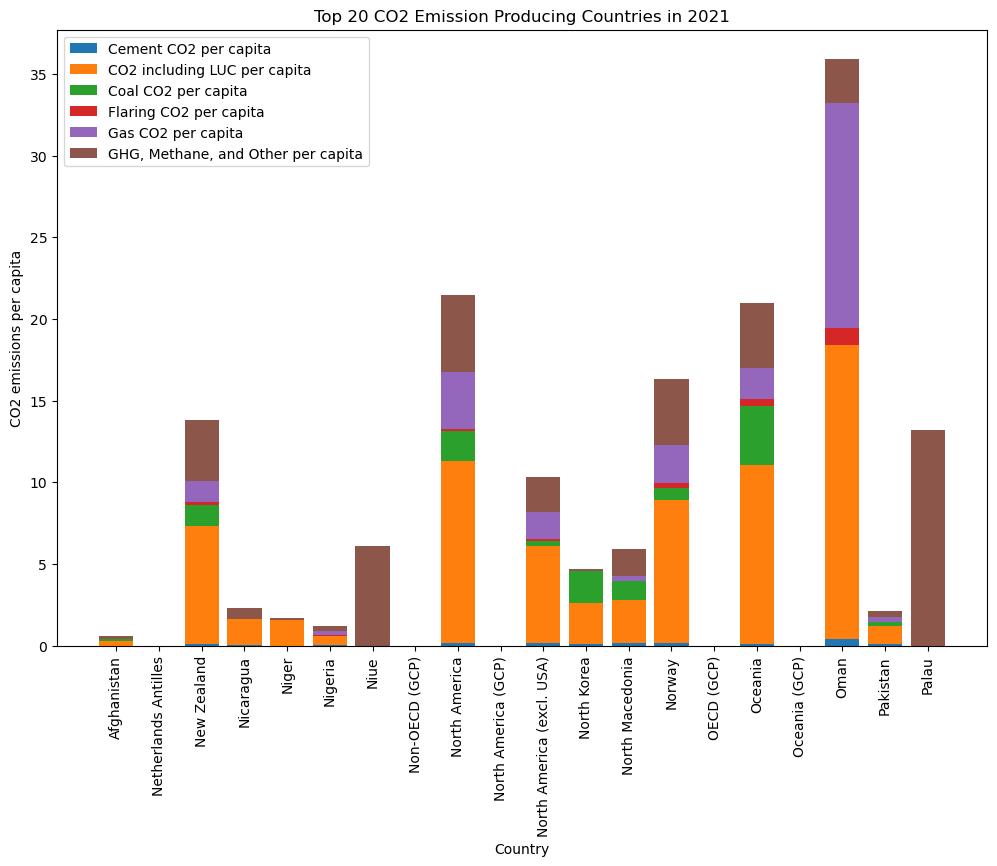

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# read Excel file
filename = '/Users/jacobwinter-bock/Downloads/co2-data.xlsx'
df = pd.read_excel(filename)

# filter data for year 2021
df = df[df['year'] == 2021]

# calculate total emissions per capita
df['total_co2_per_capita'] = df['cement_co2_per_capita'] + \
                             df['co2_including_luc_per_capita'] + \
                             df['coal_co2_per_capita'] + \
                             df['flaring_co2_per_capita'] + \
                             df['gas_co2_per_capita'] + \
                             df['ghg_per_capita'] + \
                             df['methane_per_capita'] + \
                             df['nitrous_oxide_per_capita'] + \
                             df['oil_co2_per_capita'] + \
                             df['other_co2_per_capita']

# group data by country and sum total emissions per capita
grouped_df = df.groupby(['country'])['cement_co2_per_capita', 'co2_including_luc_per_capita', 
                                     'coal_co2_per_capita', 'flaring_co2_per_capita', 
                                     'gas_co2_per_capita', 'ghg_per_capita', 'methane_per_capita',
                                     'nitrous_oxide_per_capita', 'oil_co2_per_capita', 
                                     'other_co2_per_capita', 'total_co2_per_capita'].sum()

# sort by total emissions per capita in descending order
sorted_df = grouped_df.sort_values('total_co2_per_capita', ascending=False)

# select top 20 countries
top_20_df = sorted_df.head(20)

# plot bar graph
plt.figure(figsize=(12,8))
plt.bar(top_20_df.index, top_20_df['cement_co2_per_capita'], label='Cement CO2 per capita')
plt.bar(top_20_df.index, top_20_df['co2_including_luc_per_capita'], bottom=top_20_df['cement_co2_per_capita'], 
        label='CO2 including LUC per capita')
plt.bar(top_20_df.index, top_20_df['coal_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + 
        top_20_df['co2_including_luc_per_capita'], label='Coal CO2 per capita')
plt.bar(top_20_df.index, top_20_df['flaring_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + 
        top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'], label='Flaring CO2 per capita')
plt.bar(top_20_df.index, top_20_df['gas_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + 
        top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + 
        top_20_df['flaring_co2_per_capita'], label='Gas CO2 per capita')

# Calculate the sum of ghg, methane, and other sources and plot it as a stacked bar plot
ghg_methane_other_sum = top_20_df['ghg_per_capita'] + top_20_df['methane_per_capita'] + top_20_df['nitrous_oxide_per_capita'] + top_20_df['oil_co2_per_capita'] + top_20_df['other_co2_per_capita']
plt.bar(top_20_df.index, ghg_methane_other_sum, bottom=top_20_df['cement_co2_per_capita'] +
top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] +
top_20_df['flaring_co2_per_capita'] + top_20_df['gas_co2_per_capita'], label='GHG, Methane, and Other per capita')

#Add legend and axis labels
plt.legend()
plt.xlabel('Country')
plt.ylabel('CO2 emissions per capita')
plt.title('Top 20 CO2 Emission Producing Countries in 2021')
plt.xticks(rotation=90)

#Display plot
plt.show()

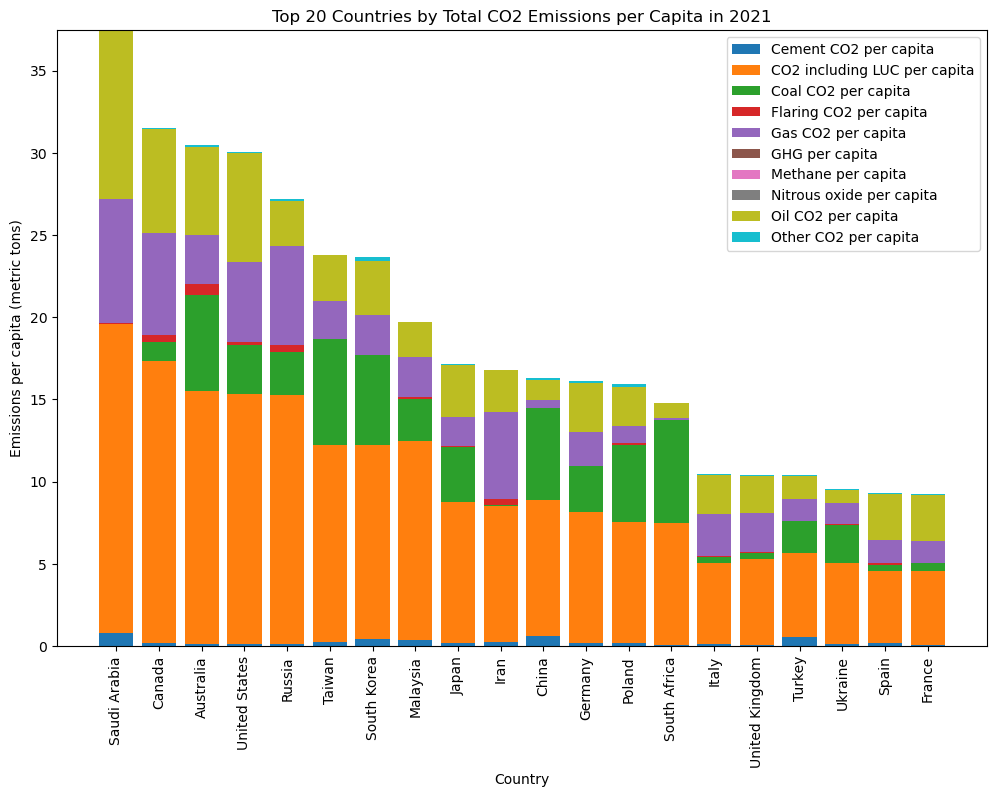

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# read Excel file
filename = '/Users/jacobwinter-bock/Downloads/co2-data.xlsx'
df = pd.read_excel(filename)

# filter data for year 2021
df = df[df['year'] == 2021]

# calculate total emissions per capita
df['total_co2_per_capita'] = df[['cement_co2_per_capita', 'co2_including_luc_per_capita', 
                                 'coal_co2_per_capita', 'flaring_co2_per_capita', 
                                 'gas_co2_per_capita', 'ghg_per_capita', 'methane_per_capita',
                                 'nitrous_oxide_per_capita', 'oil_co2_per_capita', 
                                 'other_co2_per_capita']].sum(axis=1)

# select the countries to plot
countries = ['China', 'United States', 'India', 'Russia', 'Japan', 'Germany', 'Canada', 'Iran', 
             'South Korea', 'Indonesia', 'Saudi Arabia', 'Brazil', 'Mexico', 'Australia', 'South Africa', 
             'Turkey', 'United Kingdom', 'Italy', 'France', 'Poland', 'Taiwan', 'Thailand', 'Malaysia', 
             'Spain', 'Ukraine']

# filter data for the selected countries
df = df[df['country'].isin(countries)]

# group data by country and sum total emissions per capita
grouped_df = df.groupby(['country'])[['cement_co2_per_capita', 'co2_including_luc_per_capita', 
                                      'coal_co2_per_capita', 'flaring_co2_per_capita', 
                                      'gas_co2_per_capita', 'ghg_per_capita', 'methane_per_capita',
                                      'nitrous_oxide_per_capita', 'oil_co2_per_capita', 
                                      'other_co2_per_capita', 'total_co2_per_capita']].sum()

# sort by total emissions per capita in descending order
sorted_df = grouped_df.sort_values('total_co2_per_capita', ascending=False)

# select top 20 countries
top_20_df = sorted_df.head(20)

# plot bar graph
plt.figure(figsize=(12,8))
plt.bar(top_20_df.index, top_20_df['cement_co2_per_capita'], label='Cement CO2 per capita')
plt.bar(top_20_df.index, top_20_df['co2_including_luc_per_capita'], bottom=top_20_df['cement_co2_per_capita'], 
        label='CO2 including LUC per capita')
plt.bar(top_20_df.index, top_20_df['coal_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + 
        top_20_df['co2_including_luc_per_capita'], label='Coal CO2 per capita')
plt.bar(top_20_df.index, top_20_df['flaring_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + 
        top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'], label='Flaring CO2 per capita')
plt.bar(top_20_df.index, top_20_df['gas_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] + 
        top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + top_20_df['flaring_co2_per_capita'], label='Gas CO2 per capita')
plt.bar(top_20_df.index, top_20_df['ghg_per_capita'], bottom=top_20_df['cement_co2_per_capita'] +
        top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + top_20_df['flaring_co2_per_capita'] + top_20_df['gas_co2_per_capita'], label='GHG per capita')
plt.bar(top_20_df.index, top_20_df['methane_per_capita'], bottom=top_20_df['cement_co2_per_capita'] +
        top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + top_20_df['flaring_co2_per_capita'] + top_20_df['gas_co2_per_capita'] + top_20_df['ghg_per_capita'], label='Methane per capita')
plt.bar(top_20_df.index, top_20_df['nitrous_oxide_per_capita'], bottom=top_20_df['cement_co2_per_capita'] +
        top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + top_20_df['flaring_co2_per_capita'] + top_20_df['gas_co2_per_capita'] + top_20_df['ghg_per_capita'] + top_20_df['methane_per_capita'], label='Nitrous oxide per capita')
plt.bar(top_20_df.index, top_20_df['oil_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] +
        top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + top_20_df['flaring_co2_per_capita'] + top_20_df['gas_co2_per_capita'] + top_20_df['ghg_per_capita'] + top_20_df['methane_per_capita'] + top_20_df['nitrous_oxide_per_capita'], label='Oil CO2 per capita')
plt.bar(top_20_df.index, top_20_df['other_co2_per_capita'], bottom=top_20_df['cement_co2_per_capita'] +
        top_20_df['co2_including_luc_per_capita'] + top_20_df['coal_co2_per_capita'] + top_20_df['flaring_co2_per_capita'] + top_20_df['gas_co2_per_capita'] + top_20_df['ghg_per_capita'] + top_20_df['methane_per_capita'] + top_20_df['nitrous_oxide_per_capita'] + top_20_df['oil_co2_per_capita'], label='Other CO2 per capita')

plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Emissions per capita (metric tons)')
plt.title('Top 20 Countries by Total CO2 Emissions per Capita in 2021')
plt.legend()
plt.show()

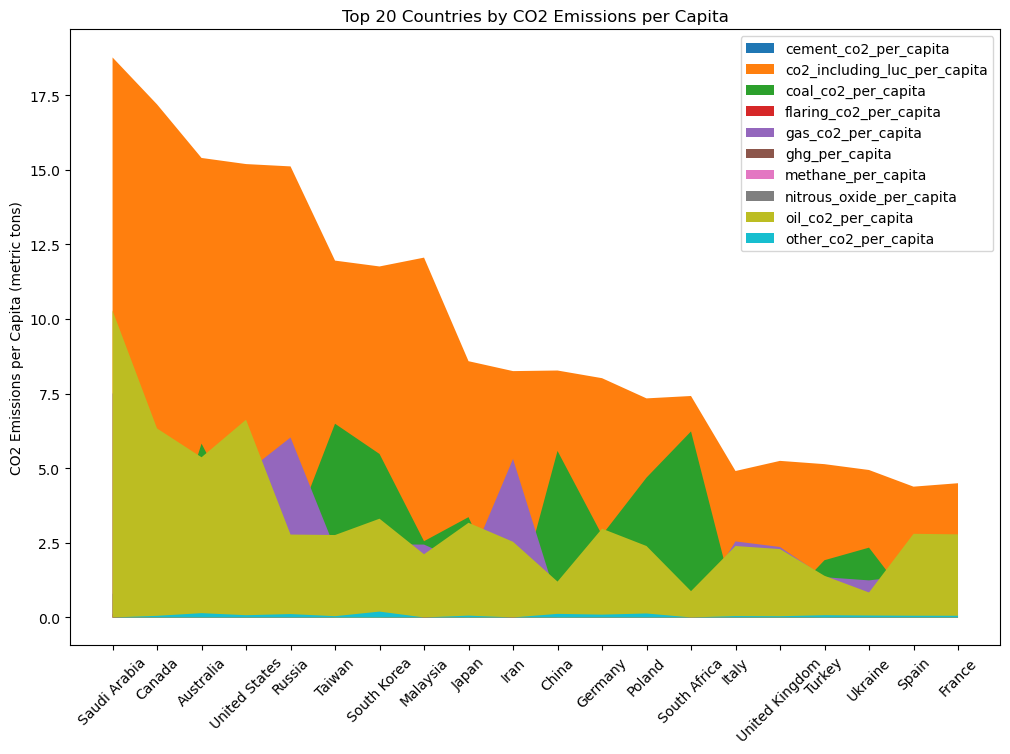

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# read Excel file
filename = '/Users/jacobwinter-bock/Downloads/co2-data.xlsx'
df = pd.read_excel(filename)

# filter data for year 2021
df = df[df['year'] == 2021]

# calculate total emissions per capita
df['total_co2_per_capita'] = df[['cement_co2_per_capita', 'co2_including_luc_per_capita', 
                                 'coal_co2_per_capita', 'flaring_co2_per_capita', 
                                 'gas_co2_per_capita', 'ghg_per_capita', 'methane_per_capita',
                                 'nitrous_oxide_per_capita', 'oil_co2_per_capita', 
                                 'other_co2_per_capita']].sum(axis=1)

# select the countries to plot
countries = ['China', 'United States', 'India', 'Russia', 'Japan', 'Germany', 'Canada', 'Iran', 
             'South Korea', 'Indonesia', 'Saudi Arabia', 'Brazil', 'Mexico', 'Australia', 'South Africa', 
             'Turkey', 'United Kingdom', 'Italy', 'France', 'Poland', 'Taiwan', 'Thailand', 'Malaysia', 
             'Spain', 'Ukraine']

# filter data for the selected countries
df = df[df['country'].isin(countries)]

# group data by country and sum total emissions per capita
grouped_df = df.groupby(['country'])[['cement_co2_per_capita', 'co2_including_luc_per_capita', 
                                      'coal_co2_per_capita', 'flaring_co2_per_capita', 
                                      'gas_co2_per_capita', 'ghg_per_capita', 'methane_per_capita',
                                      'nitrous_oxide_per_capita', 'oil_co2_per_capita', 
                                      'other_co2_per_capita', 'total_co2_per_capita']].sum()

# sort by total emissions per capita in descending order
sorted_df = grouped_df.sort_values('total_co2_per_capita', ascending=False)

# select top 20 countries
top_20_df = sorted_df.head(20)

# create area plots
plt.figure(figsize=(12,8))

for col in top_20_df.columns[:-1]:
    plt.fill_between(top_20_df.index, top_20_df[col], label=col)

plt.legend()
plt.xticks(rotation=45)
plt.ylabel('CO2 Emissions per Capita (metric tons)')
plt.title('Top 20 Countries by CO2 Emissions per Capita')
plt.show()


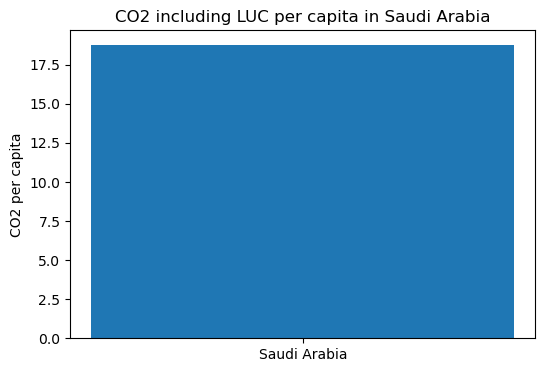

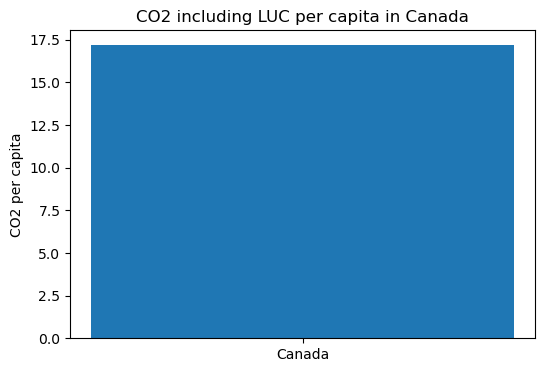

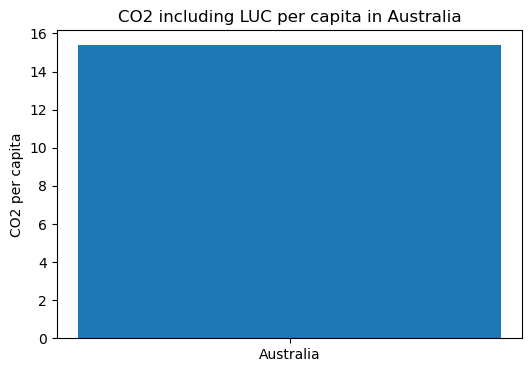

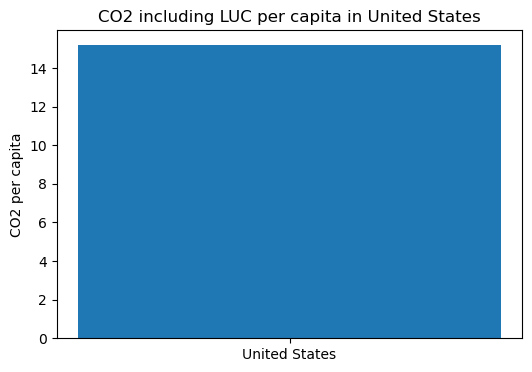

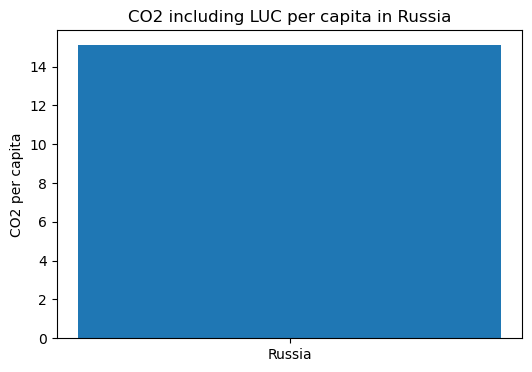

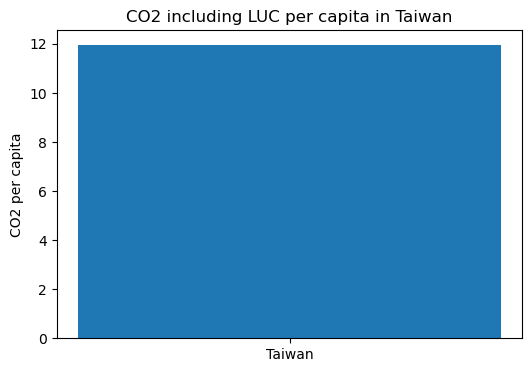

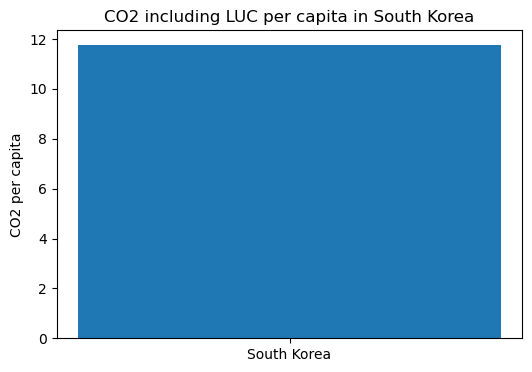

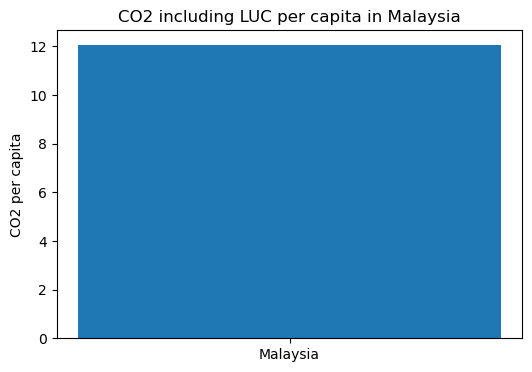

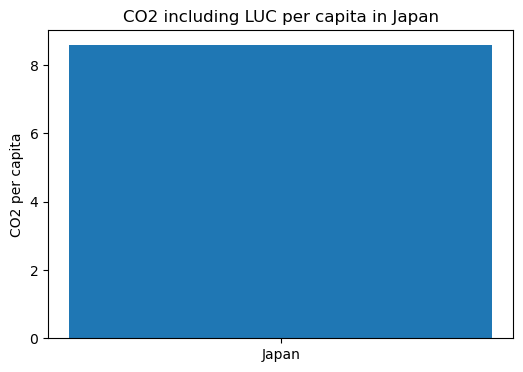

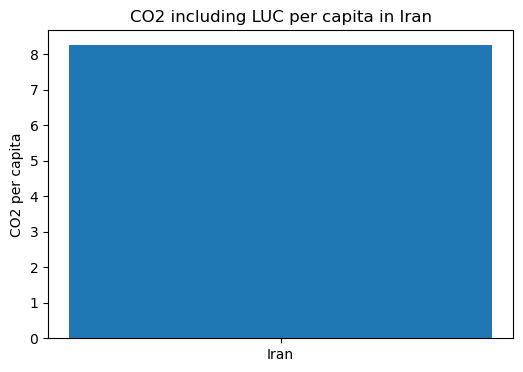

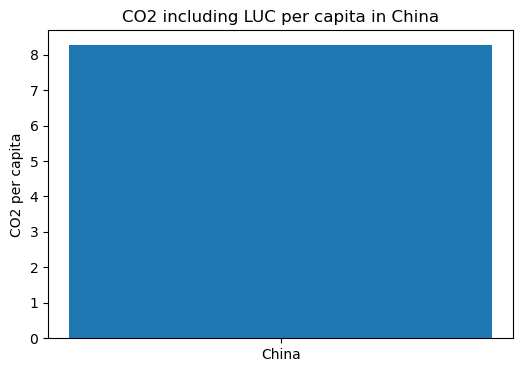

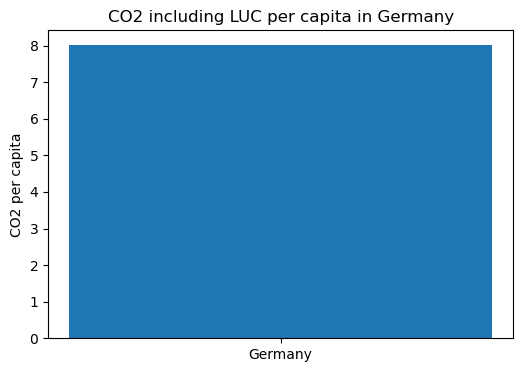

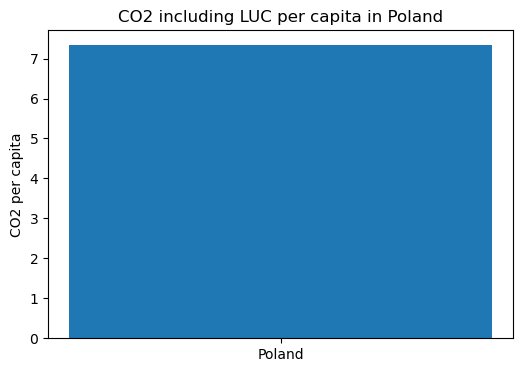

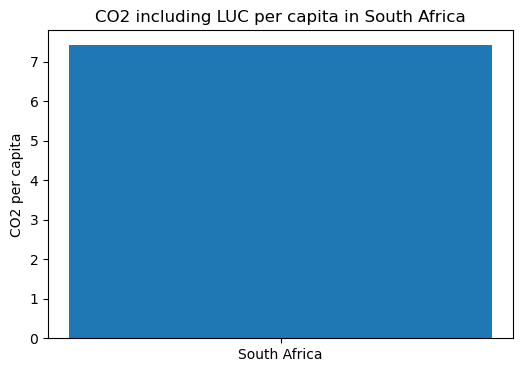

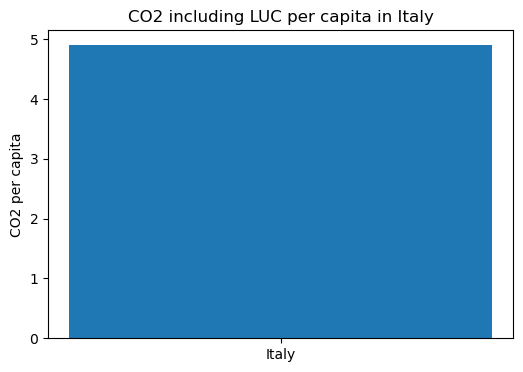

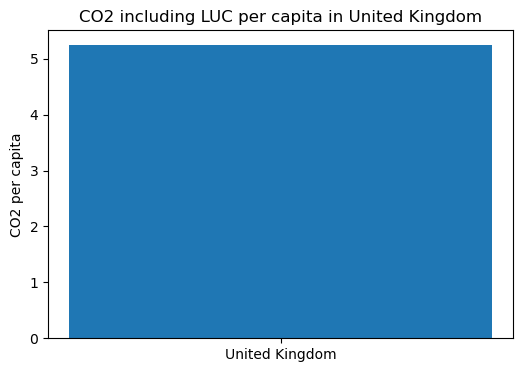

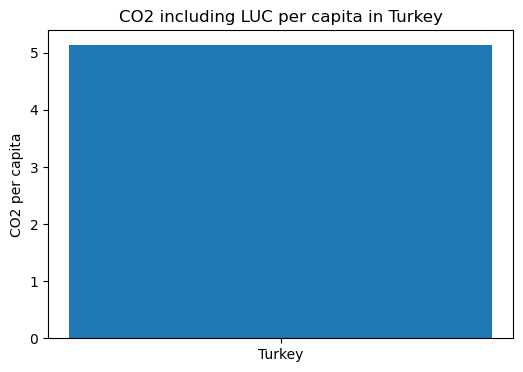

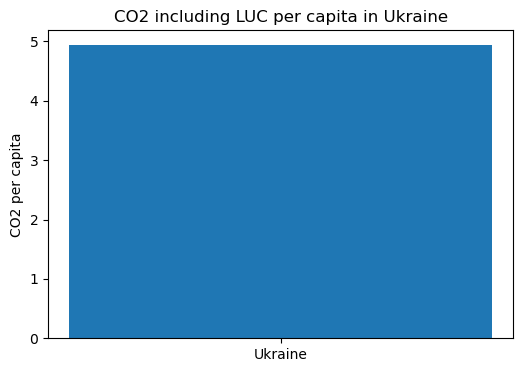

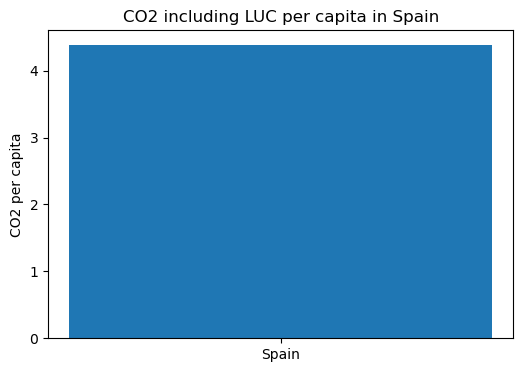

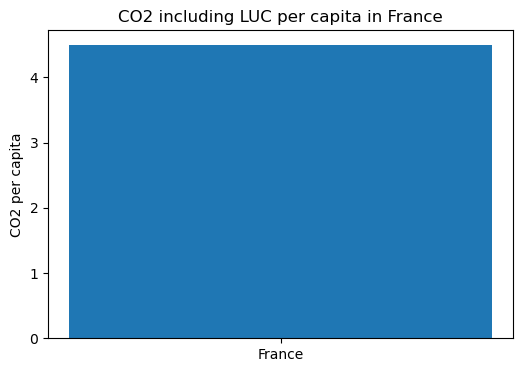

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# read Excel file
filename = '/Users/jacobwinter-bock/Downloads/co2-data.xlsx'
df = pd.read_excel(filename)

# filter data for year 2021
df = df[df['year'] == 2021]

# calculate total emissions per capita
df['total_co2_per_capita'] = df[['cement_co2_per_capita', 'co2_including_luc_per_capita',
'coal_co2_per_capita', 'flaring_co2_per_capita',
'gas_co2_per_capita', 'ghg_per_capita', 'methane_per_capita',
'nitrous_oxide_per_capita', 'oil_co2_per_capita',
'other_co2_per_capita']].sum(axis=1)

# select the countries to plot
countries = ['China', 'United States', 'India', 'Russia', 'Japan', 'Germany', 'Canada', 'Iran',
'South Korea', 'Indonesia', 'Saudi Arabia', 'Brazil', 'Mexico', 'Australia', 'South Africa',
'Turkey', 'United Kingdom', 'Italy', 'France', 'Poland', 'Taiwan', 'Thailand', 'Malaysia',
'Spain', 'Ukraine']

# filter data for the selected countries
df = df[df['country'].isin(countries)]

# group data by country and sum total emissions per capita
grouped_df = df.groupby(['country'])[['cement_co2_per_capita', 'co2_including_luc_per_capita',
'coal_co2_per_capita', 'flaring_co2_per_capita',
'gas_co2_per_capita', 'ghg_per_capita', 'methane_per_capita',
'nitrous_oxide_per_capita', 'oil_co2_per_capita',
'other_co2_per_capita', 'total_co2_per_capita']].sum()

# sort by total emissions per capita in descending order
sorted_df = grouped_df.sort_values('total_co2_per_capita', ascending=False)

# select top 20 countries
top_20_df = sorted_df.head(20)

# plot bar graph for each country
for country in top_20_df.index:
    data = top_20_df.loc[country][1:2] # select the 'co2_including_luc_per_capita' column
    plt.figure(figsize=(6,4))
    plt.bar([country], data.values[0])
    plt.title(f'CO2 including LUC per capita in {country}')
    plt.ylabel('CO2 per capita')
    plt.show()


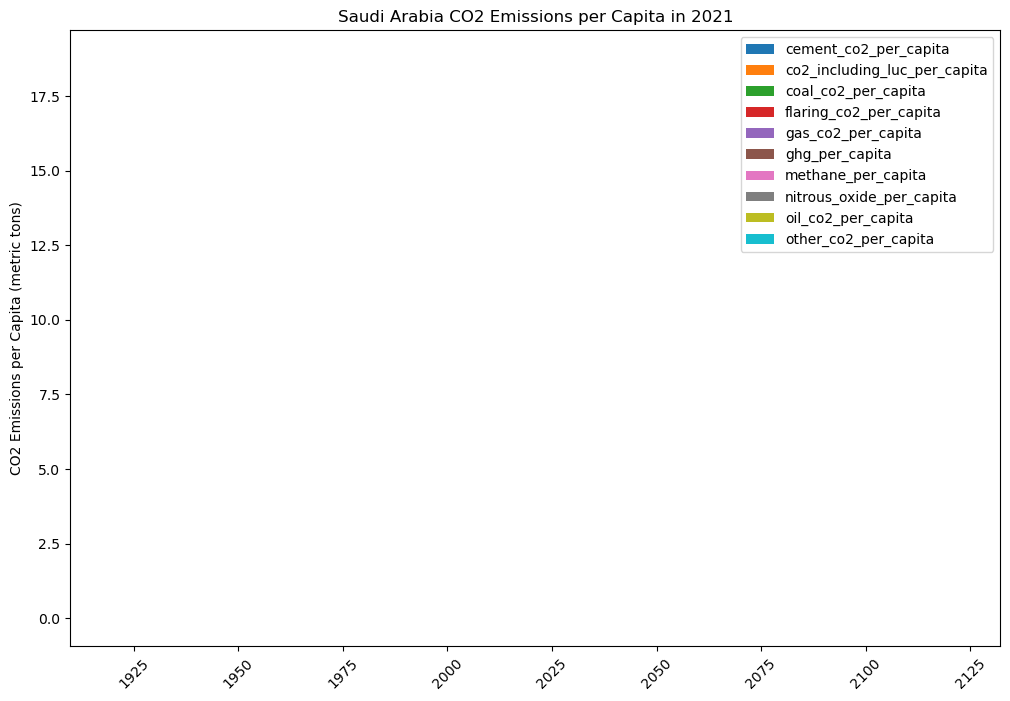

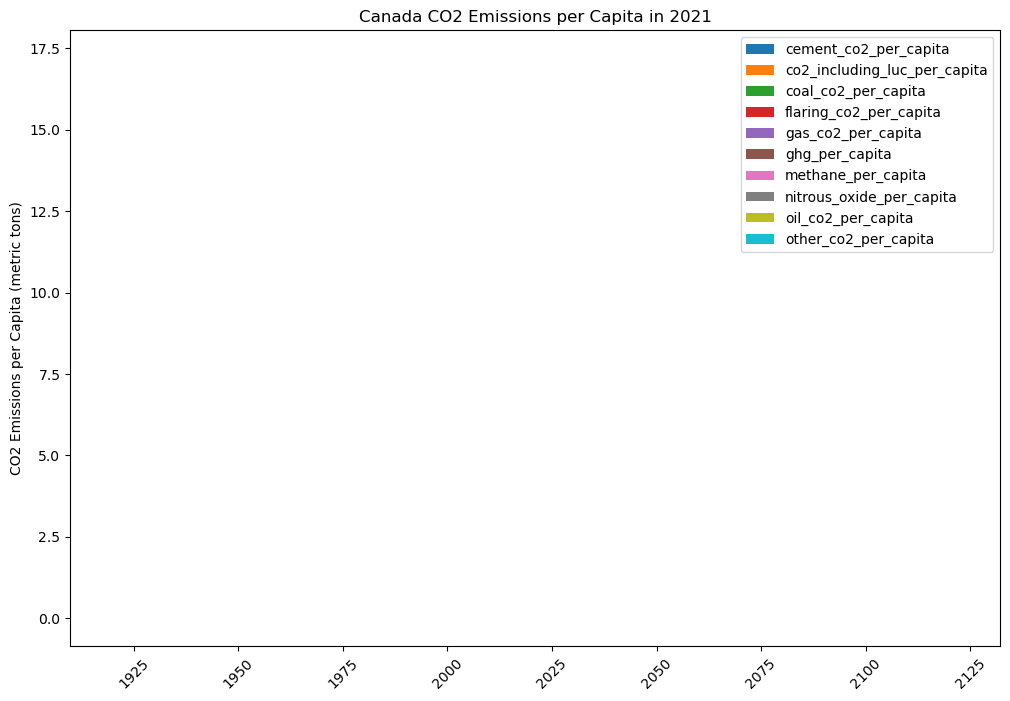

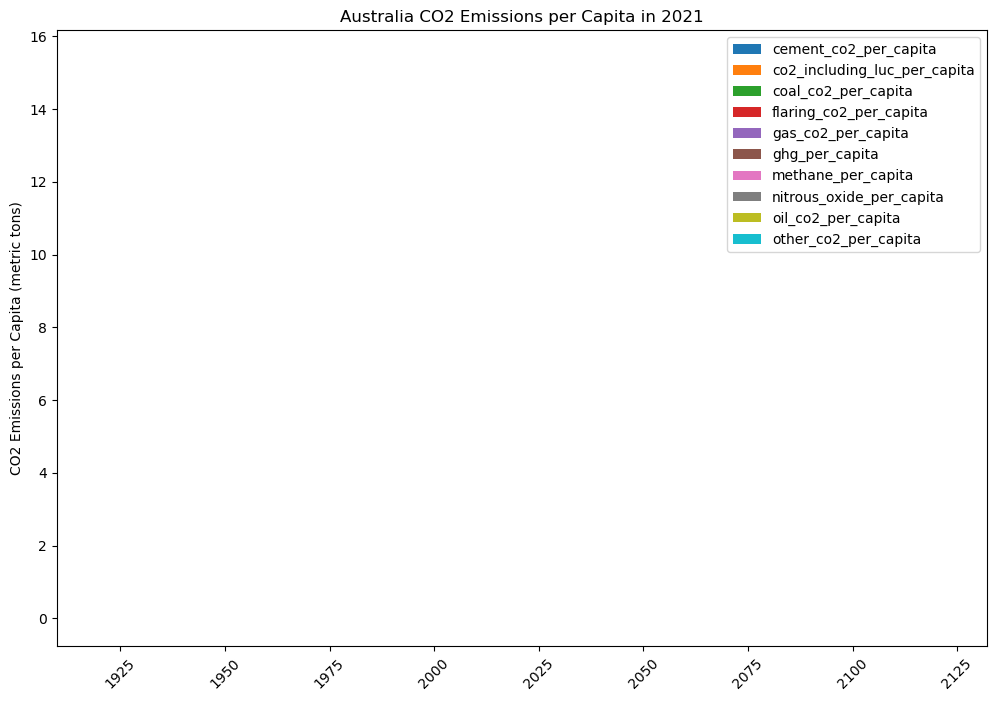

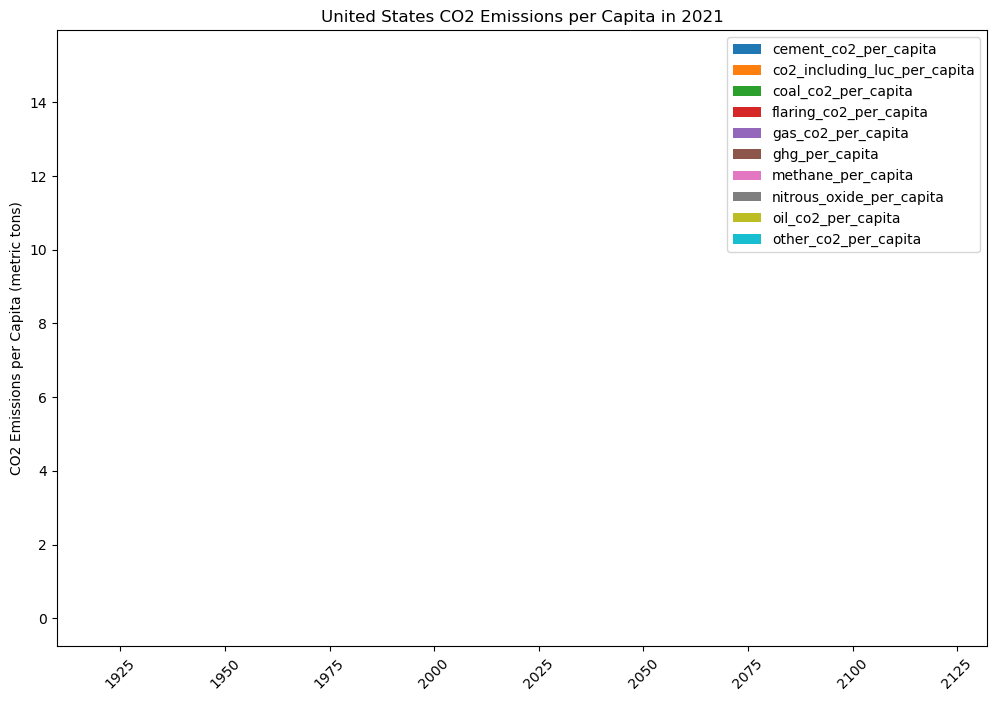

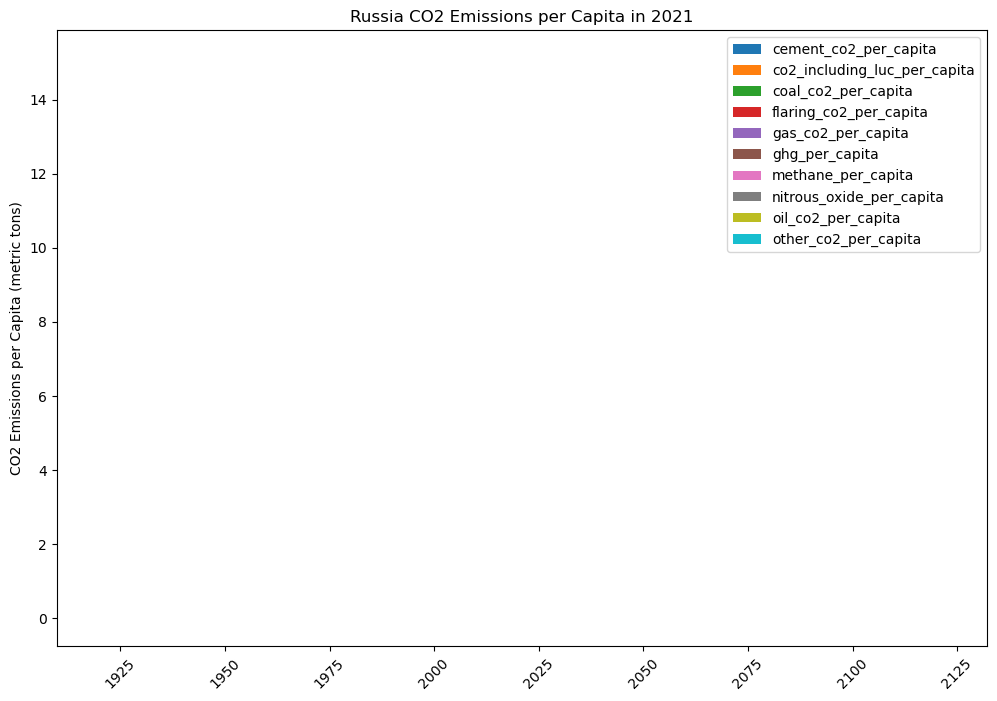

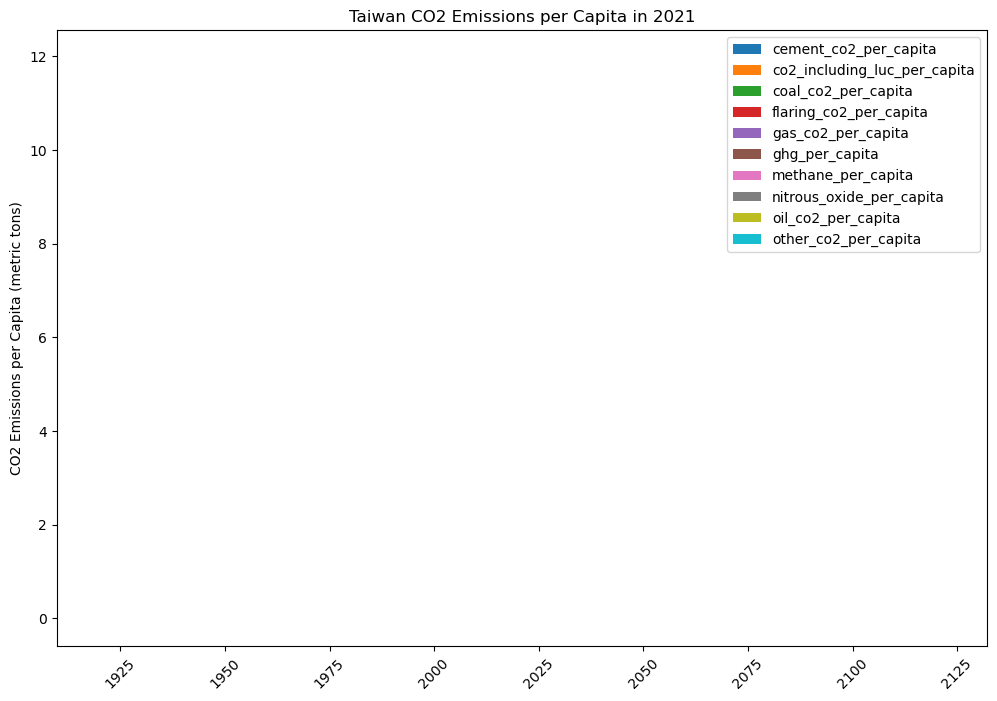

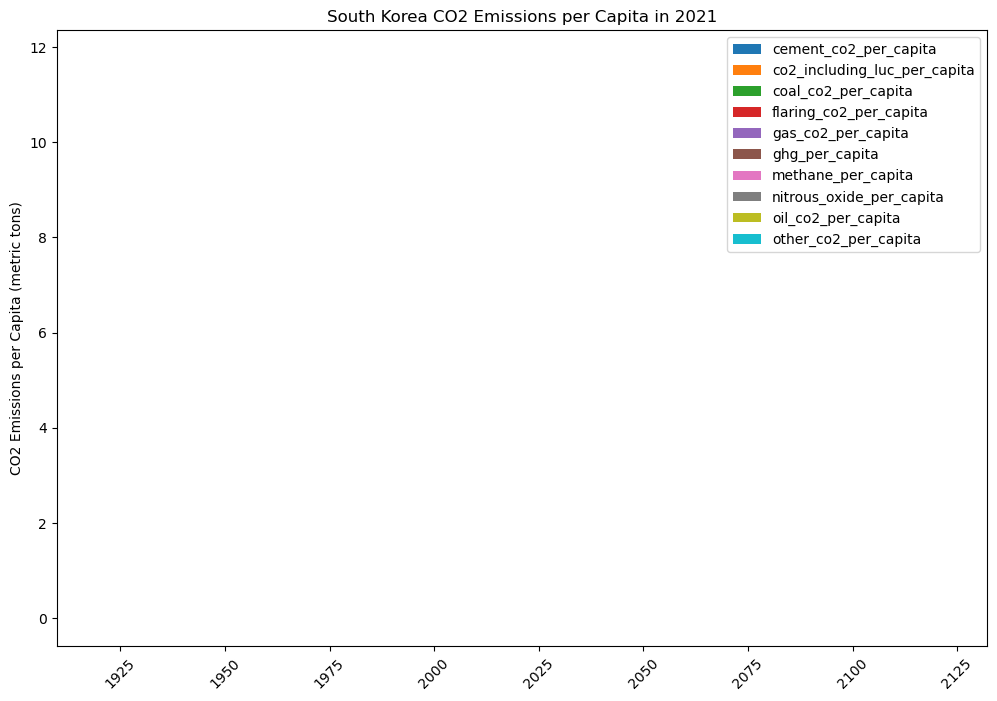

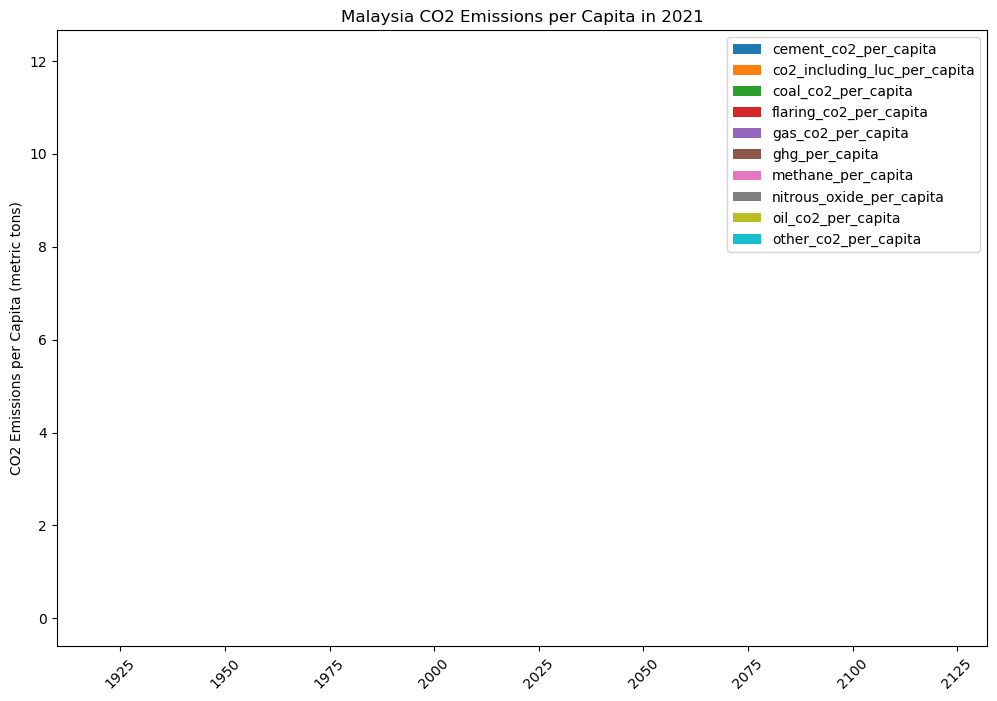

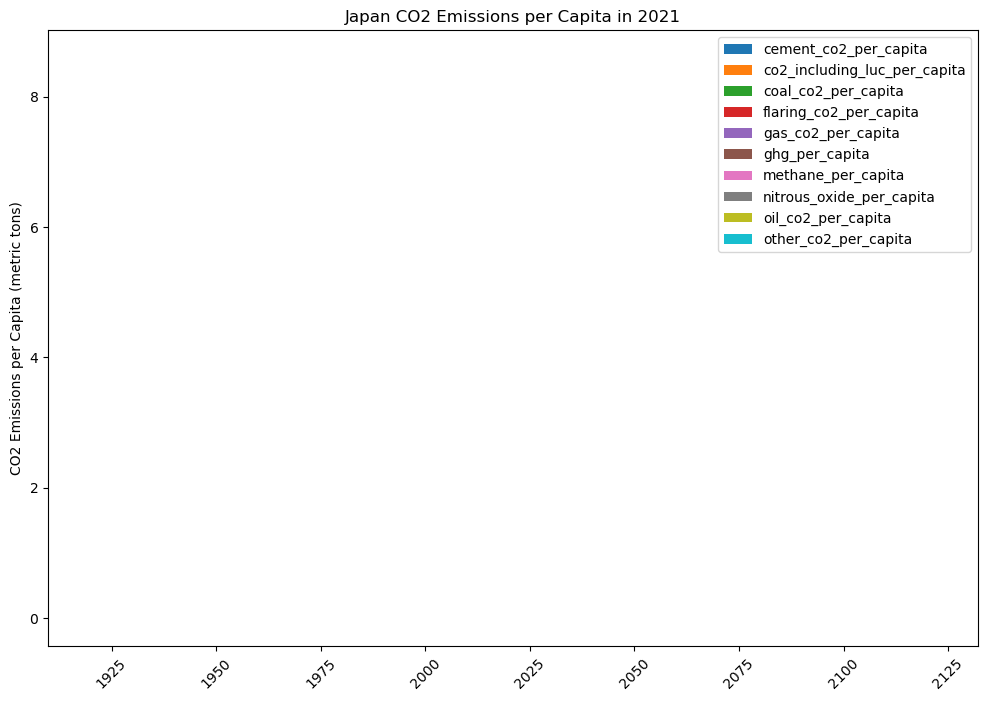

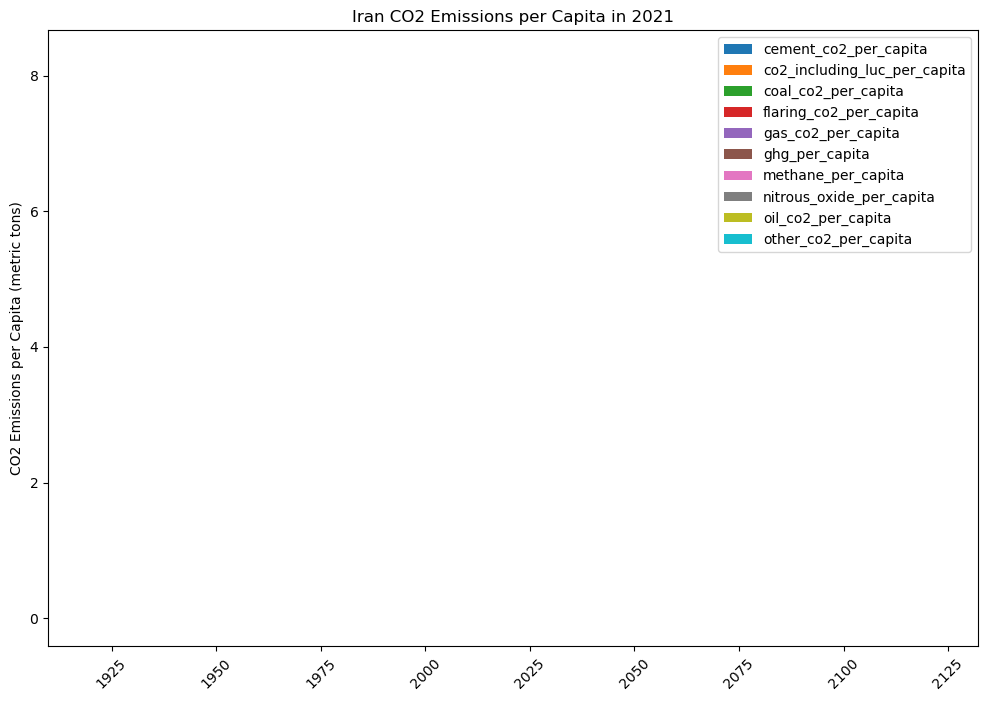

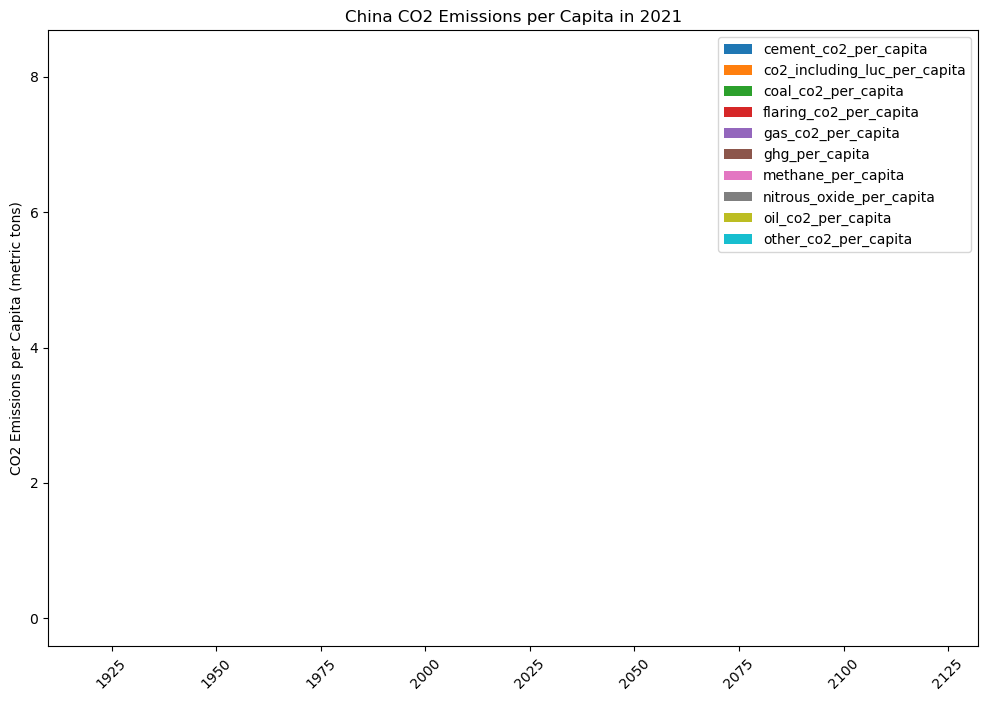

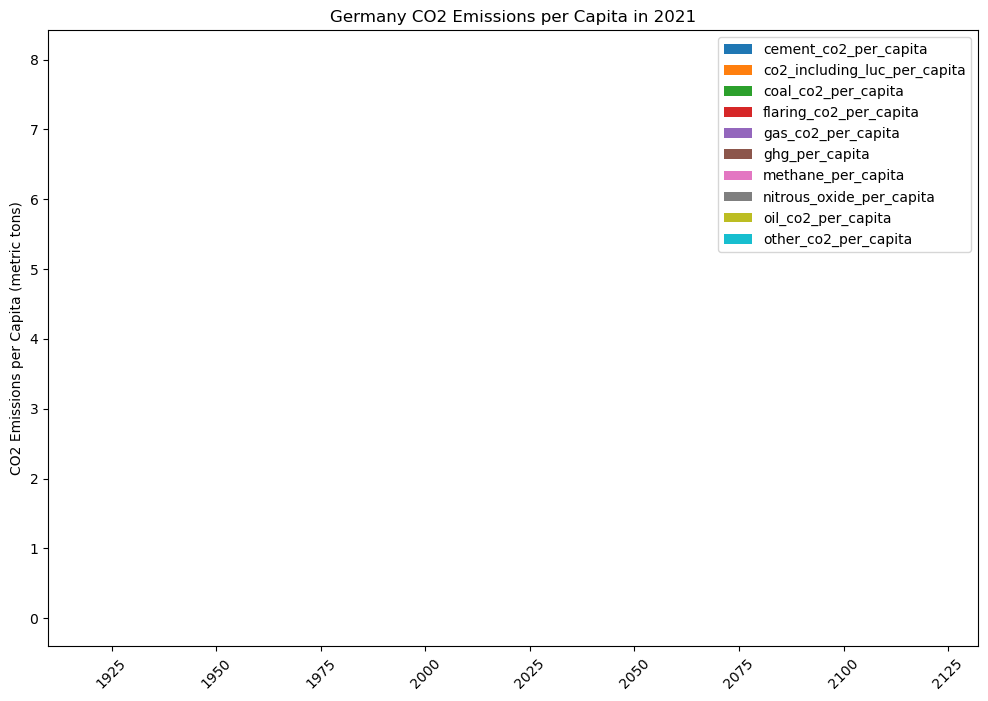

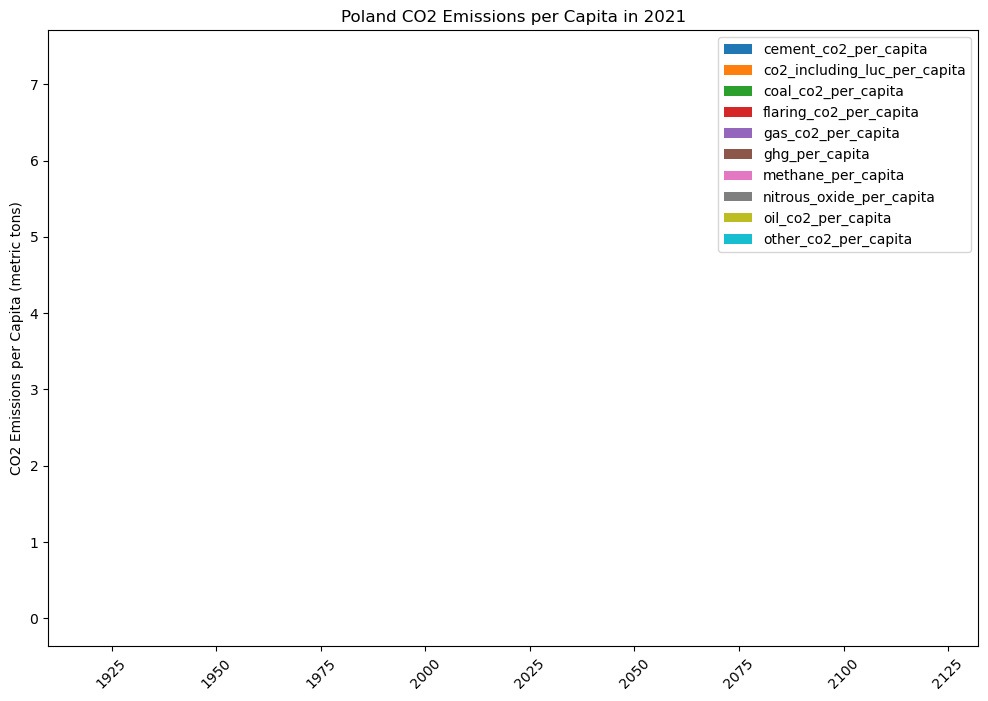

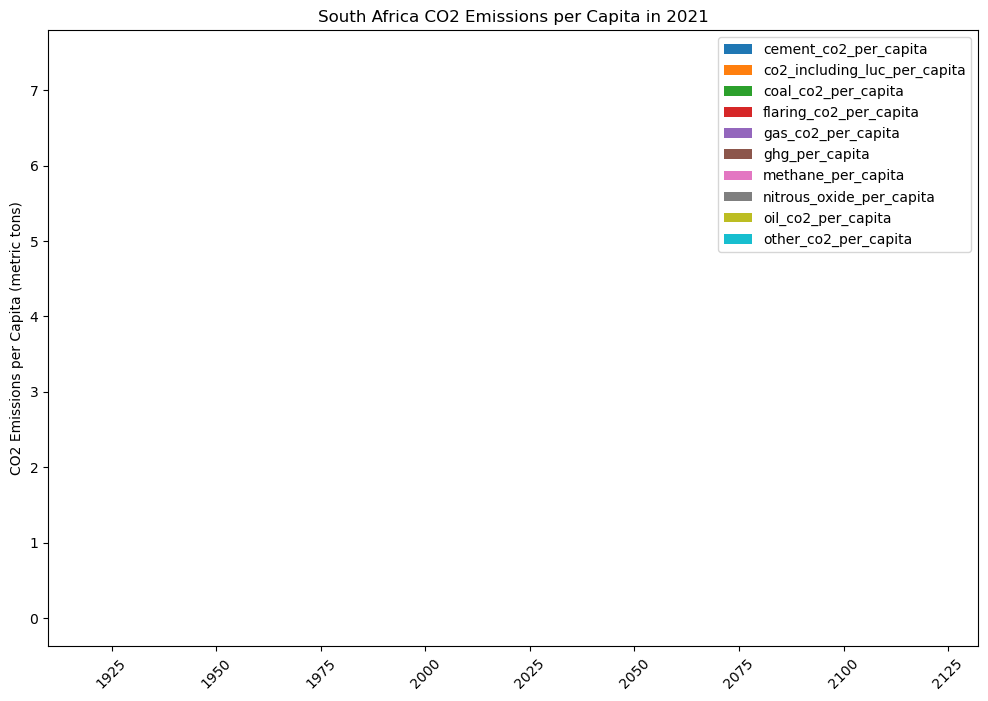

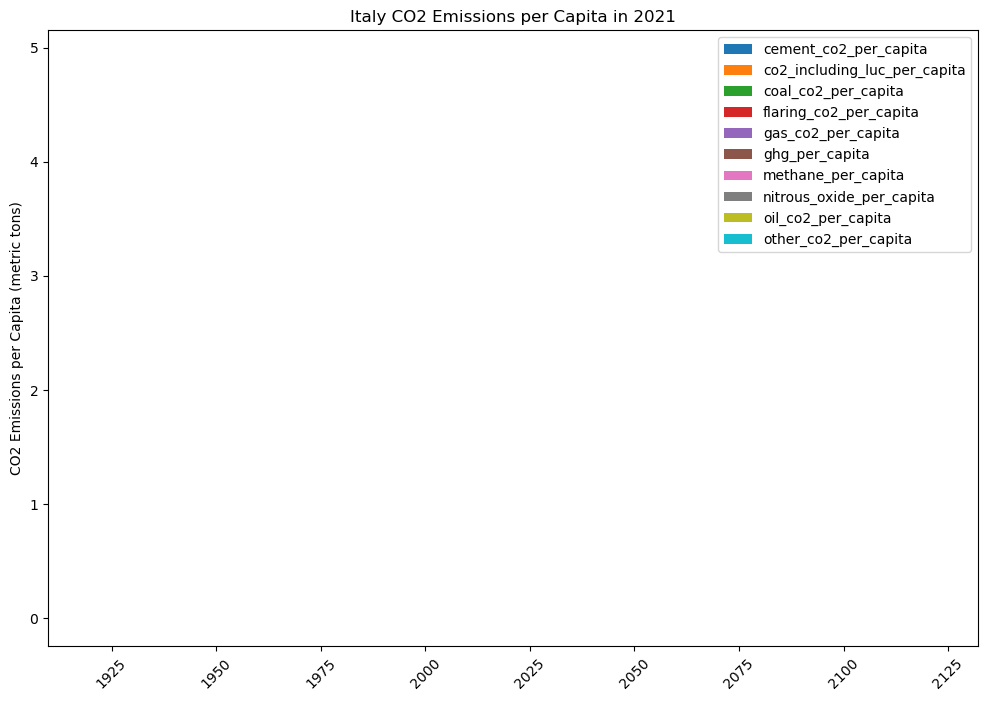

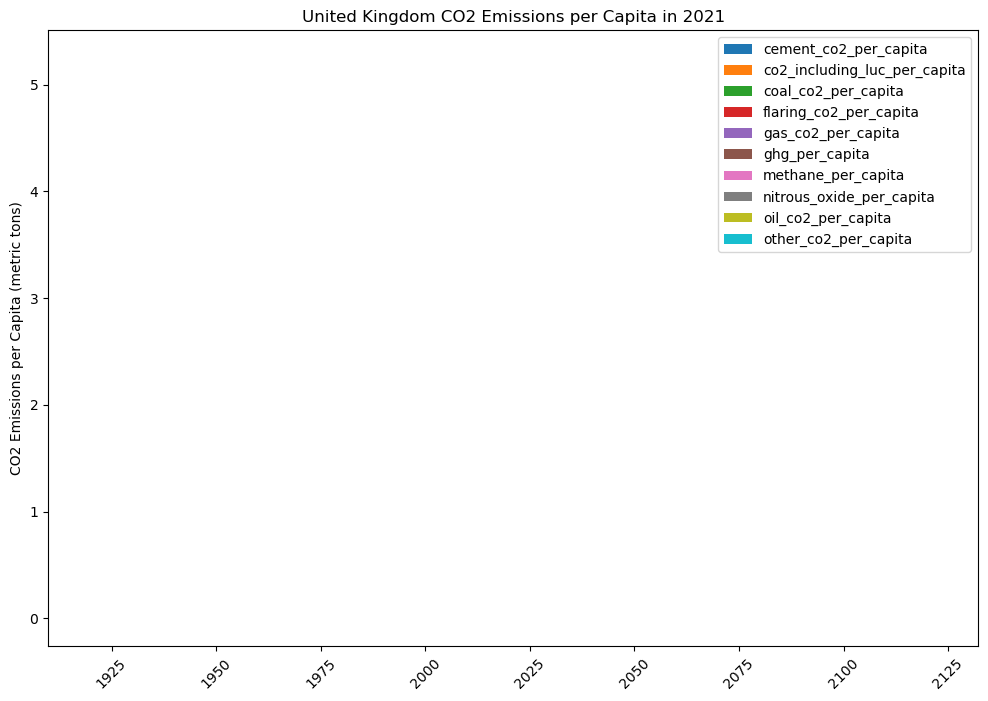

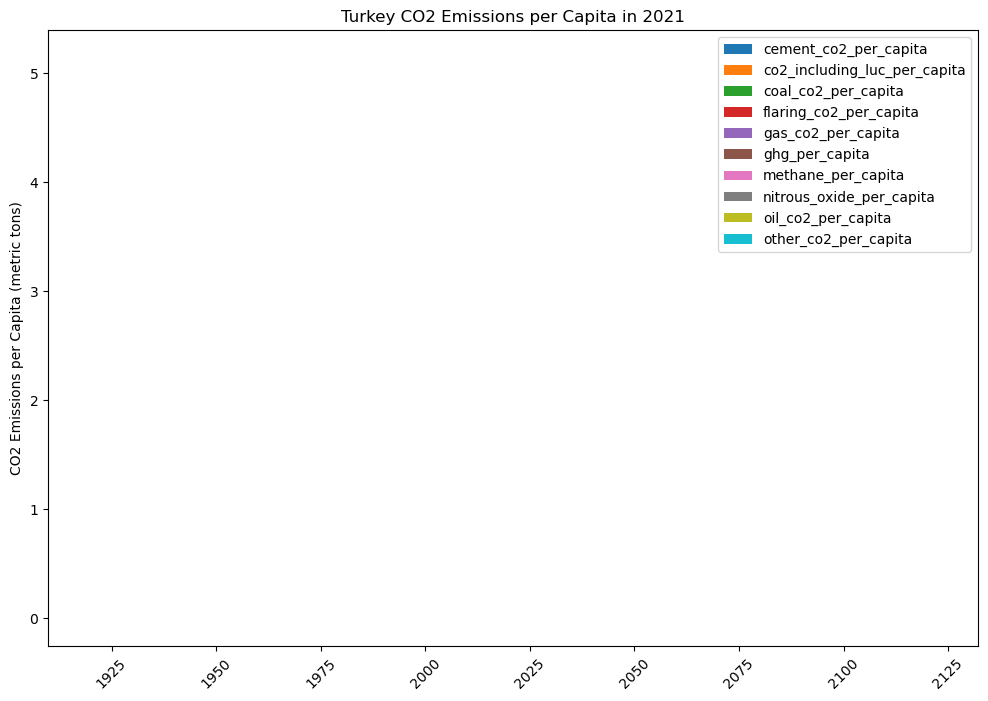

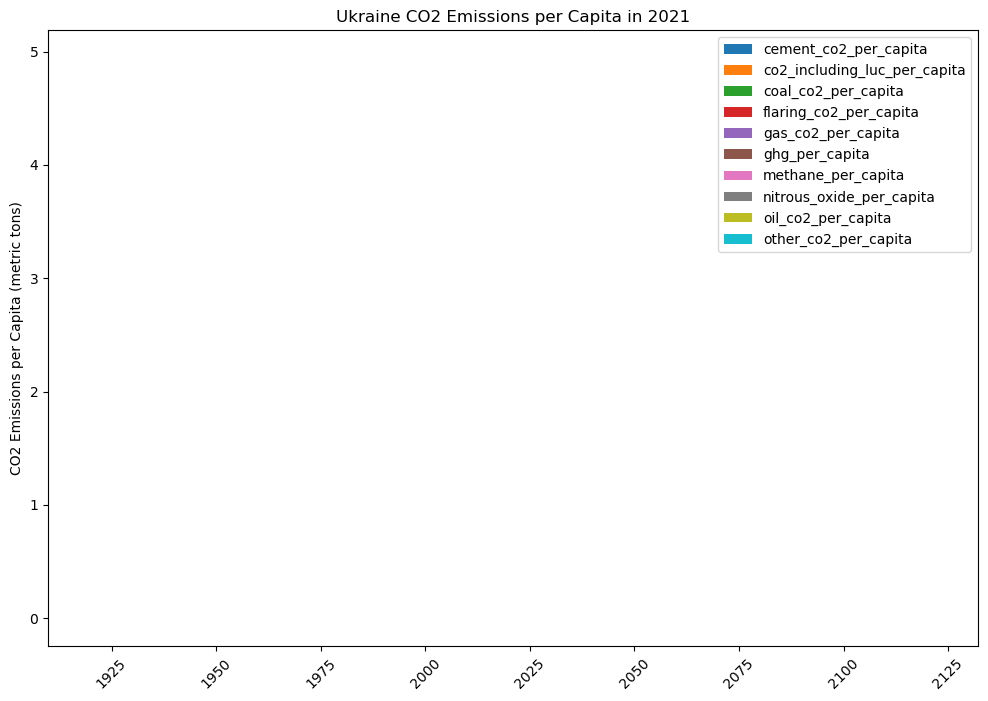

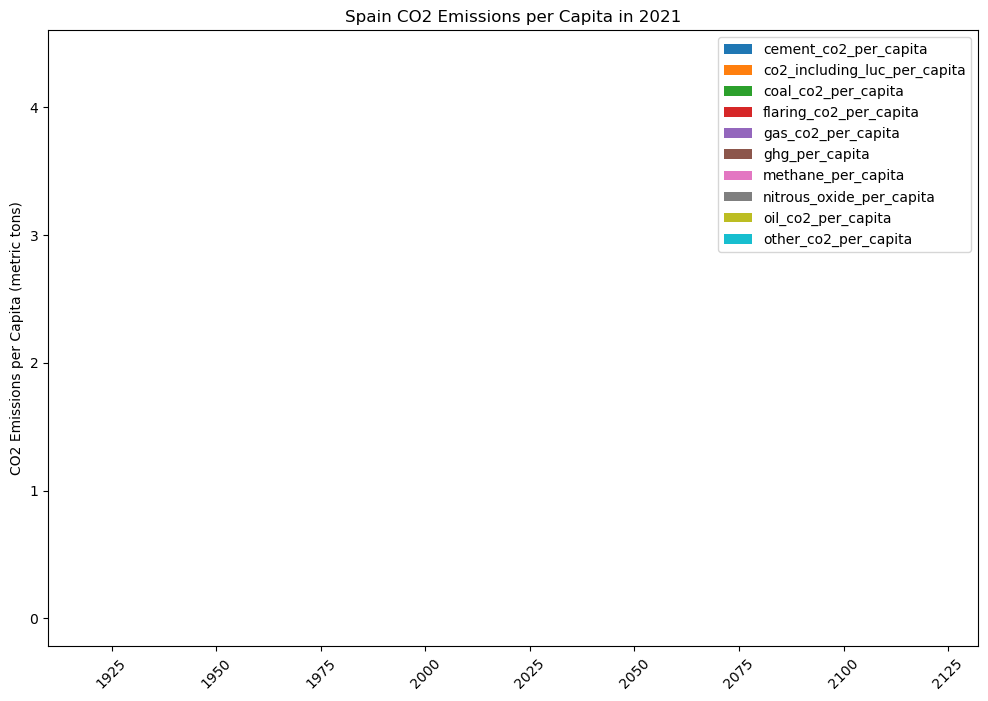

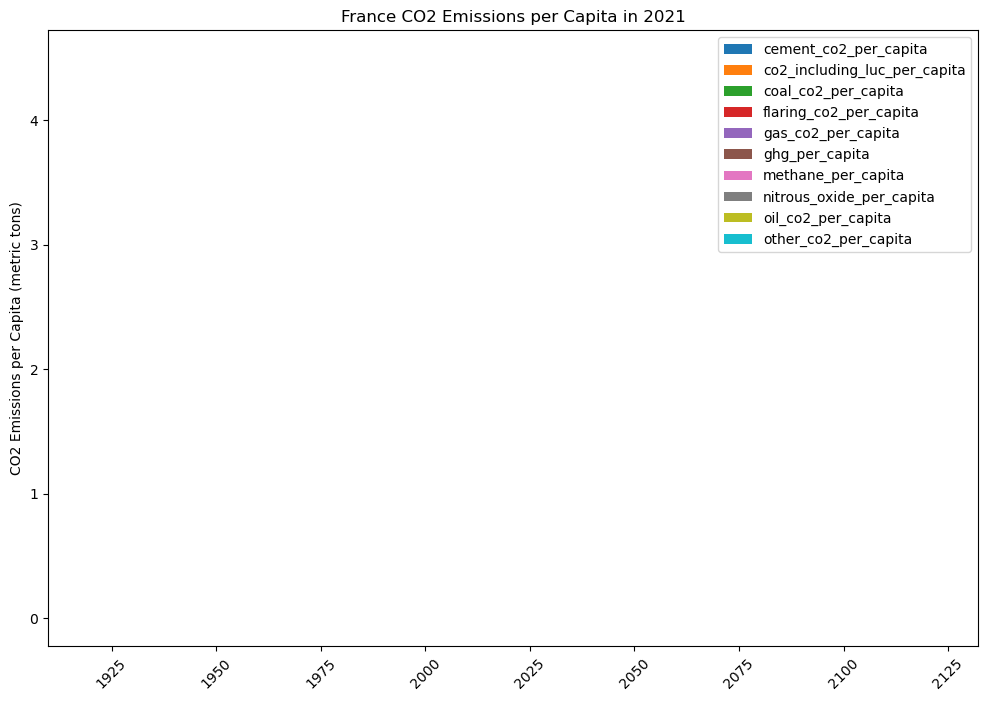

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# read Excel file
filename = '/Users/jacobwinter-bock/Downloads/co2-data.xlsx'
df = pd.read_excel(filename)

# filter data for year 2021
df = df[df['year'] == 2021]

# calculate total emissions per capita
df['total_co2_per_capita'] = df[['cement_co2_per_capita', 'co2_including_luc_per_capita', 
                                 'coal_co2_per_capita', 'flaring_co2_per_capita', 
                                 'gas_co2_per_capita', 'ghg_per_capita', 'methane_per_capita',
                                 'nitrous_oxide_per_capita', 'oil_co2_per_capita', 
                                 'other_co2_per_capita']].sum(axis=1)

# select the countries to plot
countries = ['China', 'United States', 'India', 'Russia', 'Japan', 'Germany', 'Canada', 'Iran', 
             'South Korea', 'Indonesia', 'Saudi Arabia', 'Brazil', 'Mexico', 'Australia', 'South Africa', 
             'Turkey', 'United Kingdom', 'Italy', 'France', 'Poland', 'Taiwan', 'Thailand', 'Malaysia', 
             'Spain', 'Ukraine']

# filter data for the selected countries
df = df[df['country'].isin(countries)]

# group data by country and sum total emissions per capita
grouped_df = df.groupby(['country'])[['cement_co2_per_capita', 'co2_including_luc_per_capita', 
                                      'coal_co2_per_capita', 'flaring_co2_per_capita', 
                                      'gas_co2_per_capita', 'ghg_per_capita', 'methane_per_capita',
                                      'nitrous_oxide_per_capita', 'oil_co2_per_capita', 
                                      'other_co2_per_capita', 'total_co2_per_capita']].sum()

# sort by total emissions per capita in descending order
sorted_df = grouped_df.sort_values('total_co2_per_capita', ascending=False)

# select top 20 countries
top_20_df = sorted_df.head(20)

# create area plots for each country
for country in top_20_df.index:
    plt.figure(figsize=(12,8))
    for col in top_20_df.columns[:-1]:
        plt.fill_between(df[df['country']==country]['year'], df[df['country']==country][col], label=col)

    plt.legend()
    plt.xticks(rotation=45)
    plt.ylabel('CO2 Emissions per Capita (metric tons)')
    plt.title(f'{country} CO2 Emissions per Capita in 2021')
    plt.show()


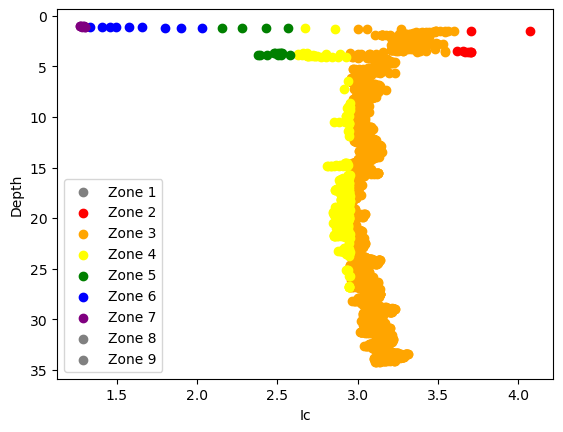

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file from sheet 7
df = pd.read_excel('/Users/jacobwinter-bock/Downloads/Zone for AGE.xlsx', sheet_name='Sheet7')


# Sort by 'Ic' in ascending order
df = df.sort_values('Ic')

# Define color codes for each zone
zone_colors = {
    1: 'gray',
    2: 'red',
    3: 'orange',
    4: 'yellow',
    5: 'green',
    6: 'blue',
    7: 'purple',
    8: 'gray',
    9: 'gray'
}

# Define the criteria for each zone
zone_criteria = {
    1: pd.isna(df['Ic']),
    2: df['Ic'] > 3.6,
    3: (df['Ic'] >= 2.95) & (df['Ic'] <= 3.6),
    4: (df['Ic'] >= 2.6) & (df['Ic'] < 2.95),
    5: (df['Ic'] >= 2.05) & (df['Ic'] < 2.6),
    6: (df['Ic'] >= 1.31) & (df['Ic'] < 2.05),
    7: df['Ic'] < 1.31,
    8: pd.isna(df['Ic']),
    9: pd.isna(df['Ic'])
}

# Assign a zone number to each row in the dataframe
for zone_num, criteria in zone_criteria.items():
    df.loc[criteria, 'zone'] = zone_num

# Plot scatter plot
fig, ax = plt.subplots()
for zone_num, color in zone_colors.items():
    zone_df = df[df['zone'] == zone_num]
    ax.scatter(zone_df['Ic'], zone_df['Depth'], color=color, label=f'Zone {zone_num}')
ax.legend()
ax.set_xlabel('Ic')
ax.set_ylabel('Depth')
ax.invert_yaxis()
plt.show()


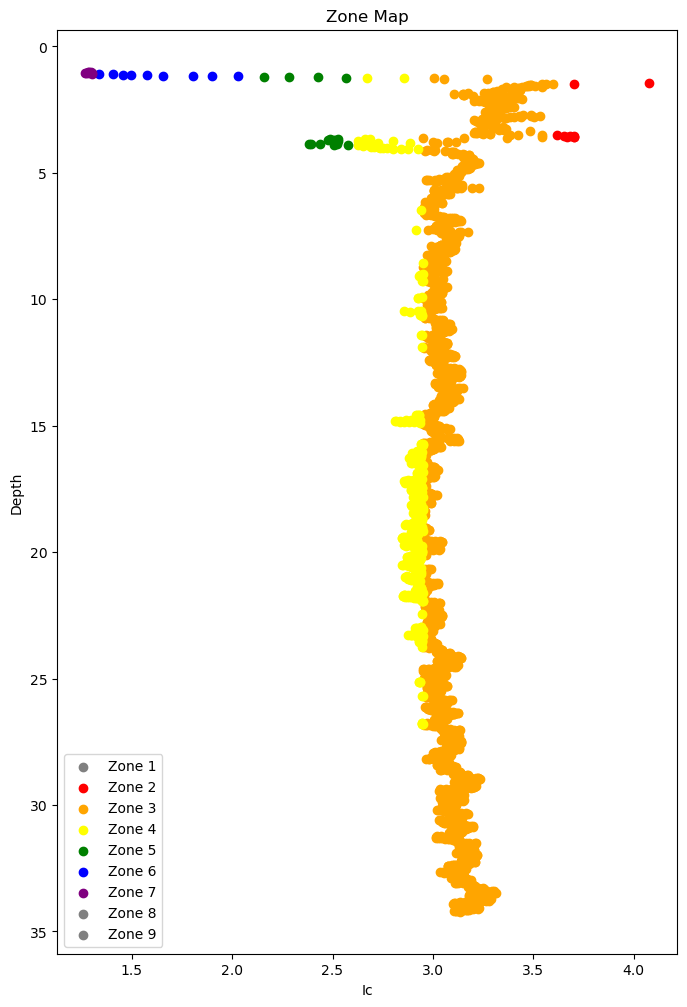

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file from sheet 7
df = pd.read_excel('/Users/jacobwinter-bock/Downloads/Zone for AGE.xlsx', sheet_name='Sheet7')

# Sort by 'Ic' in ascending order
df = df.sort_values('Ic')

# Define color codes for each zone
zone_colors = {
    1: 'gray',
    2: 'red',
    3: 'orange',
    4: 'yellow',
    5: 'green',
    6: 'blue',
    7: 'purple',
    8: 'gray',
    9: 'gray'
}

# Define the criteria for each zone
zone_criteria = {
    1: pd.isna(df['Ic']),
    2: df['Ic'] > 3.6,
    3: (df['Ic'] >= 2.95) & (df['Ic'] <= 3.6),
    4: (df['Ic'] >= 2.6) & (df['Ic'] < 2.95),
    5: (df['Ic'] >= 2.05) & (df['Ic'] < 2.6),
    6: (df['Ic'] >= 1.31) & (df['Ic'] < 2.05),
    7: df['Ic'] < 1.31,
    8: pd.isna(df['Ic']),
    9: pd.isna(df['Ic'])
}

# Assign a zone number to each row in the dataframe
for zone_num, criteria in zone_criteria.items():
    df.loc[criteria, 'zone'] = zone_num

# Plot scatter plot
fig, ax = plt.subplots(figsize=(8, 12))  # set figure size
for zone_num, color in zone_colors.items():
    zone_df = df[df['zone'] == zone_num]
    ax.scatter(zone_df['Ic'], zone_df['Depth'], color=color, label=f'Zone {zone_num}')
ax.legend()
ax.set_xlabel('Ic')
ax.set_ylabel('Depth')
ax.invert_yaxis()
ax.set_title('Zone Map')
plt.show()
